Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
anltdate="2020-12-01"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
#anltdate="2020-12-01"
#configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-12-01  Afghanistan_nan         0         283.0         659.0   
1  2020-12-01      Albania_nan         0         557.0        1937.0   
2  2020-12-01      Algeria_nan         0         978.0        3031.0   
3  2020-12-01      Andorra_nan         0          33.0         135.0   
4  2020-12-01       Angola_nan         0          36.0         131.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1510.0              46498.0               46662.0  35530000.0   
1        4626.0              38182.0               38882.0   2878445.0   
2        7332.0              83199.0               84300.0  41320000.0   
3         441.0               6745.0                6820.0     77239.0   
4         505.0              15139.0               15255.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001309   
1                                       0.013265   
2                                       0.002014   
3                                       0.087338   
4                                       0.000461   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.013087                    164.0   
1                                           0.132651                    700.0   
2                                           0.020136                   1101.0   
3                                           0.873382                     75.0   
4                                           0.004607                    116.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    4.615818             215.714279   
1                  243.186859             660.857117   
2                   26.645693            1047.428589   
3                  971.012024              63.000000   
4                    3.529454              72.142860   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           8.499859      
1                                         321.423553      
2                                          35.488869      
3                                        1141.910156      
4                                           3.073059

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2020-12-01         United States_nan          160427.578125   
1   2020-12-01                 India_nan           40709.855469   
2   2020-12-01                Brazil_nan           35467.144531   
3   2020-12-01                Turkey_nan           26473.142578   
4   2020-12-01                Russia_nan           25598.142578   
5   2020-12-01                 Italy_nan           24251.285156   
6   2020-12-01               Germany_nan           17584.285156   
7   2020-12-01                Poland_nan           16354.000000   
8   2020-12-01        United Kingdom_nan           14594.571289   
9   2020-12-01               Ukraine_nan           14128.713867   
10  2020-12-01                  Iran_nan           13607.000000   
11  2020-12-01                France_nan           10936.571289   
12  2020-12-01                 Spain_nan            9367.286133   
13  2020-12-01                Mexico_nan            9169.286133   
14  2020-12-01              Colombia_nan            8832.428711   
15  2020-12-01               Romania_nan            7501.428711   
16  2020-12-01             Argentina_nan            7128.856934   
17  2020-12-01                Serbia_nan            7035.856934   
18  2020-12-01               Hungary_nan            5595.714355   
19  2020-12-01             Indonesia_nan            5253.285645   
20  2020-12-01                Sweden_nan            4976.285645   
21  2020-12-01           Netherlands_nan            4808.571289   
22  2020-12-01              Portugal_nan            4751.285645   
23  2020-12-01               Austria_nan            4589.000000   
24  2020-12-01                Jordan_nan            4431.428711   
25  2020-12-01               Morocco_nan            4115.428711   
26  2020-12-01               Georgia_nan            3842.000000   
27  2020-12-01           Switzerland_nan            3817.142822   
28  2020-12-01               Czechia_nan            3808.571533   
29  2020-12-01            Azerbaijan_nan            3699.285645   
30  2020-12-01               Croatia_nan            3250.142822   
31  2020-12-01              Pakistan_nan            2942.714355   
32  2020-12-01              Bulgaria_nan            2904.857178   
33  2020-12-01          South Africa_nan            2892.142822   
34  2020-12-01               Belgium_nan            2491.857178   
35  2020-12-01            Bangladesh_nan            2167.428467   
36  2020-12-01                  Iraq_nan            2156.000000   
37  2020-12-01                 Japan_nan            2058.285645   
38  2020-12-01             Lithuania_nan            1871.285767   
39  2020-12-01                  Peru_nan            1837.142822   
40  2020-12-01    West Bank and Gaza_nan            1778.714233   
41  2020-12-01                Greece_nan            1752.142822   
42  2020-12-01            Canada_Ontario            1602.857178   
43  2020-12-01               Belarus_nan            1595.000000   
44  2020-12-01                 Nepal_nan            1594.857178   
45  2020-12-01           Philippines_nan            1573.714233   
46  2020-12-01               Lebanon_nan            1489.571411   
47  2020-12-01                 Burma_nan            1458.285767   
48  2020-12-01                Panama_nan            1449.714233   
49  2020-12-01              Slovenia_nan            1433.714233   
50  2020-12-01            Canada_Alberta            1393.714233   
51  2020-12-01                 Chile_nan            1380.428589   
52  2020-12-01              Slovakia_nan            1351.000000   
53  2020-12-01             Canada_Quebec            1309.285767   
54  2020-12-01              Malaysia_nan            1291.142822   
55  2020-12-01               Moldova_nan            1278.000000   
56  2020-12-01               Denmark_nan            1261.000000   
57  2020-12-01  United Arab Emirates_nan            1257.857178   
58  2020-12-01               Armenia_nan            1202.

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-12-01           United States_nan          160427.578125   
1   2020-12-01                  Brazil_nan           35467.144531   
2   2020-12-01                  Turkey_nan           26473.142578   
3   2020-12-01                  Russia_nan           25598.142578   
4   2020-12-01                   Italy_nan           24251.285156   
5   2020-12-01                 Germany_nan           17584.285156   
6   2020-12-01                  Poland_nan           16354.000000   
7   2020-12-01          United Kingdom_nan           14594.571289   
8   2020-12-01                 Ukraine_nan           14128.713867   
9   2020-12-01                    Iran_nan           13607.000000   
10  2020-12-01                  France_nan           10936.571289   
11  2020-12-01                   Spain_nan            9367.286133   
12  2020-12-01                  Mexico_nan            9169.286133   
13  2020-12-01                Colombia_nan            8832.428711   
14  2020-12-01                 Romania_nan            7501.428711   
15  2020-12-01               Argentina_nan            7128.856934   
16  2020-12-01                  Serbia_nan            7035.856934   
17  2020-12-01                 Hungary_nan            5595.714355   
18  2020-12-01                  Sweden_nan            4976.285645   
19  2020-12-01             Netherlands_nan            4808.571289   
20  2020-12-01                Portugal_nan            4751.285645   
21  2020-12-01                 Austria_nan            4589.000000   
22  2020-12-01                  Jordan_nan            4431.428711   
23  2020-12-01                 Morocco_nan            4115.428711   
24  2020-12-01                 Georgia_nan            3842.000000   
25  2020-12-01             Switzerland_nan            3817.142822   
26  2020-12-01                 Czechia_nan            3808.571533   
27  2020-12-01              Azerbaijan_nan            3699.285645   
28  2020-12-01                 Croatia_nan            3250.142822   
29  2020-12-01                Bulgaria_nan            2904.857178   
..         ...                         ...                    ...   
40  2020-12-01                   Chile_nan            1380.428589   
41  2020-12-01                Slovakia_nan            1351.000000   
42  2020-12-01               Canada_Quebec            1309.285767   
43  2020-12-01                 Moldova_nan            1278.000000   
44  2020-12-01                 Denmark_nan            1261.000000   
45  2020-12-01    United Arab Emirates_nan            1257.857178   
46  2020-12-01                 Armenia_nan            1202.142822   
47  2020-12-01                 Tunisia_nan            1081.857178   
48  2020-12-01  Bosnia and Herzegovina_nan            1049.714233   
49  2020-12-01              Costa Rica_nan            1049.000000   
50  2020-12-01                  Israel_nan             978.285706   
51  2020-12-01         North Macedonia_nan             964.428589   
52  2020-12-01     Canada_British Columbia             833.000000   
53  2020-12-01                Paraguay_nan             764.571411   
54  2020-12-01      Dominican Republic_nan             737.000000   
55  2020-12-01                  Kosovo_nan             665.142883   
56  2020-12-01                 Albania_nan             660.857117   
57  2020-12-01                   Libya_nan             619.428589   
58  2020-12-01                  Latvia_nan             548.428589   
59  2020-12-01              Montenegro_nan             521.000000   
60  2020-12-01              Luxembourg_nan             509.571442   
61  2020-12-01              Kyrgyzstan_nan             470.428558   
62  2020-12-01                 Finland_nan             425.142853   
63  2020-12-01                  Norway_nan             423.857147   
64  2020-12-01             Canada_Manitoba             391.142853   
65  2020-12-01                 Estonia_nan             336.000000   
66  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-12-01           United States_nan          160427.578125   
1   2020-12-01                  Turkey_nan           26473.142578   
2   2020-12-01                  Russia_nan           25598.142578   
3   2020-12-01                   Italy_nan           24251.285156   
4   2020-12-01                 Germany_nan           17584.285156   
5   2020-12-01                  Poland_nan           16354.000000   
6   2020-12-01          United Kingdom_nan           14594.571289   
7   2020-12-01                 Ukraine_nan           14128.713867   
8   2020-12-01                   Spain_nan            9367.286133   
9   2020-12-01                Colombia_nan            8832.428711   
10  2020-12-01                 Romania_nan            7501.428711   
11  2020-12-01                  Serbia_nan            7035.856934   
12  2020-12-01                 Hungary_nan            5595.714355   
13  2020-12-01                  Sweden_nan            4976.285645   
14  2020-12-01             Netherlands_nan            4808.571289   
15  2020-12-01                Portugal_nan            4751.285645   
16  2020-12-01                 Austria_nan            4589.000000   
17  2020-12-01                  Jordan_nan            4431.428711   
18  2020-12-01                 Georgia_nan            3842.000000   
19  2020-12-01             Switzerland_nan            3817.142822   
20  2020-12-01                 Czechia_nan            3808.571533   
21  2020-12-01              Azerbaijan_nan            3699.285645   
22  2020-12-01                 Croatia_nan            3250.142822   
23  2020-12-01                Bulgaria_nan            2904.857178   
24  2020-12-01                 Belgium_nan            2491.857178   
25  2020-12-01               Lithuania_nan            1871.285767   
26  2020-12-01      West Bank and Gaza_nan            1778.714233   
27  2020-12-01                 Lebanon_nan            1489.571411   
28  2020-12-01                  Panama_nan            1449.714233   
29  2020-12-01                Slovenia_nan            1433.714233   
30  2020-12-01              Canada_Alberta            1393.714233   
31  2020-12-01                Slovakia_nan            1351.000000   
32  2020-12-01                 Moldova_nan            1278.000000   
33  2020-12-01                 Denmark_nan            1261.000000   
34  2020-12-01                 Armenia_nan            1202.142822   
35  2020-12-01  Bosnia and Herzegovina_nan            1049.714233   
36  2020-12-01              Costa Rica_nan            1049.000000   
37  2020-12-01         North Macedonia_nan             964.428589   
38  2020-12-01                  Kosovo_nan             665.142883   
39  2020-12-01                 Albania_nan             660.857117   
40  2020-12-01                  Latvia_nan             548.428589   
41  2020-12-01              Montenegro_nan             521.000000   
42  2020-12-01              Luxembourg_nan             509.571442   
43  2020-12-01             Canada_Manitoba             391.142853   
44  2020-12-01                 Estonia_nan             336.000000   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          678.540161          157901.0   
1                                          458.636322           31219.0   
2                                          248.009689           26046.0   
3                                          561.372375           16376.0   
4                                          297.354767           14221.0   
5                                          602.833069            5736.0   
6                                          307.531616           12330.0   
7                                          451.726715           10238.0   
8                                          281.058716           19979.0   
9                                          243.576630            8430.0   
10        

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-12-01                Brazil_nan           35467.144531   
1   2020-12-01                  Iran_nan           13607.000000   
2   2020-12-01                France_nan           10936.571289   
3   2020-12-01             Argentina_nan            7128.856934   
4   2020-12-01               Morocco_nan            4115.428711   
5   2020-12-01                Greece_nan            1752.142822   
6   2020-12-01            Canada_Ontario            1602.857178   
7   2020-12-01               Belarus_nan            1595.000000   
8   2020-12-01             Canada_Quebec            1309.285767   
9   2020-12-01  United Arab Emirates_nan            1257.857178   
10  2020-12-01               Tunisia_nan            1081.857178   
11  2020-12-01                Israel_nan             978.285706   
12  2020-12-01   Canada_British Columbia             833.000000   
13  2020-12-01              Paraguay_nan             764.571411   
14  2020-12-01                 Libya_nan             619.428589   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          233.601028           21138.0   
1                                          226.802231           13321.0   
2                                          218.762680            3980.0   
3                                          221.262024            5726.0   
4                                          156.492386            2533.0   
5                                          228.398514            1044.0   
6                                          154.015106            1747.0   
7                                          236.296951            1639.0   
8                                          216.028290            1333.0   
9                                          187.340424            1107.0   
10                                         128.443359             518.0   
11                                         157.208450            1248.0   
12                                         228.666672            2354.0   
13                                         150.513550             518.0   
14                                         126.206253             379.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        97528.0      248270.0            6335878.0  212559008.0   
1        39673.0       95249.0             962070.0   83993000.0   
2        26323.0       76556.0            2221535.0   69990000.0   
3        17256.0       49902.0            1424533.0   45106700.0   
4        11060.0       28808.0             356336.0   36817128.0   
5         3984.0       12265.0             105271.0   10740000.0   
6         5148.0       11220.0             119897.0   14570000.0   
7         5014.0       11165.0             136647.0    9449974.0   
8         4208.0        9165.0             142371.0    8485000.0   
9         3610.0        8805.0             168860.0    9400000.0   
10        2999.0        7573.0              96769.0   11791968.0   
11        3044.0        6848.0             336846.0    8712000.0   
12        2354.0        5831.0              33238.0    5100000.0   
13        1988.0        5352.0              82424.0    7111652.0   
14        1536.0        4336.0              82809.0    6871292.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.298076           
1                                            0.114542           
2                                            0.317408           
3                                            0.315814           
4                                            0.096786           
5                                            0.098019           
6                                            0.082291           
7                                            0.144601           
8                                            0.167793         

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-12-01              Mexico_nan            9169.286133   
1  2020-12-01               Chile_nan            1380.428589   
2  2020-12-01  Dominican Republic_nan             737.000000   
3  2020-12-01          Kyrgyzstan_nan             470.428558   
4  2020-12-01             Finland_nan             425.142853   
5  2020-12-01              Norway_nan             423.857147   
6  2020-12-01              Kuwait_nan             320.285706   
7  2020-12-01               Qatar_nan             202.571426   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          99.789497            6472.0   
1                                         101.283928            1313.0   
2                                          95.320854             515.0   
3                                         100.947319             371.0   
4                                         107.962997             283.0   
5                                         110.770950             322.0   
6                                         108.387718             209.0   
7                                          98.806519             185.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       34949.0       64185.0            1113543.0  128640792.0   
1        4500.0        9663.0             551743.0   19081012.0   
2        2211.0        5159.0             143988.0   10824494.0   
3        1630.0        3293.0              73178.0    6524195.0   
4        1146.0        2976.0              24912.0    5513000.0   
5         957.0        2967.0              36150.0    5357000.0   
6         759.0        2242.0             142635.0    4137000.0   
7         583.0        1418.0             138833.0    2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.086562                  10678.0   
1                                           0.289159                   1453.0   
2                                           0.133021                    887.0   
3                                           0.112166                    396.0   
4                                           0.045190                    548.0   
5                                           0.067484                    506.0   
6                                           0.344781                    401.0   
7                                           0.483699                    212.0   

   delta_new_cases_per_1M_hab  
0                   83.006325  
1                   76.148994  
2                   81.943787  
3                   60.697144  
4                   99.401413  
5                   94.455849  
6                   96.930145  
7                   73.861008

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-30                   Sudan_nan             193.142853   
1   2020-11-30              Uzbekistan_nan             179.000000   
2   2020-11-30                 Nigeria_nan             147.000000   
3   2020-11-30                 Uruguay_nan             145.285721   
4   2020-11-30             El Salvador_nan             120.428574   
5   2020-11-30                   Ghana_nan              99.285713   
6   2020-11-30                Botswana_nan              94.857140   
7   2020-11-30                 Bolivia_nan              92.000000   
8   2020-11-30                  Angola_nan              87.142860   
9   2020-11-30             China_Hong Kong              87.142860   
10  2020-11-30                Zimbabwe_nan              86.000000   
11  2020-11-30                Cameroon_nan              84.142860   
12  2020-11-30              Mozambique_nan              82.285713   
13  2020-11-30                    Cuba_nan              55.285713   
14  2020-11-30           Cote d'Ivoire_nan              24.571428   
15  2020-11-30                   Niger_nan              21.142857   
16  2020-11-30            Burkina Faso_nan              17.285715   
17  2020-11-30                 Iceland_nan              14.857142   
18  2020-11-30                Thailand_nan              11.142858   
19  2020-11-30               Nicaragua_nan               8.428572   
20  2020-11-30               Singapore_nan               7.571429   
21  2020-11-30                 Vietnam_nan               5.142857   
22  2020-11-30   Australia_New South Wales               5.000000   
23  2020-11-30                 Taiwan*_nan               4.857143   
24  2020-11-30             New Zealand_nan               3.714286   
25  2020-11-30              China_Shanghai               3.142857   
26  2020-11-30                Cambodia_nan               2.428571   
27  2020-11-30                China_Fujian               1.857143   
28  2020-11-30        China_Inner Mongolia               1.857143   
29  2020-11-30             China_Guangdong               1.428571   
30  2020-11-30               China_Sichuan               1.285714   
31  2020-11-30   Australia_South Australia               0.857143   
32  2020-11-30        Australia_Queensland               0.714286   
33  2020-11-30               China_Shaanxi               0.714286   
34  2020-11-30              China_Shandong               0.714286   
35  2020-11-30               China_Jiangsu               0.428571   
36  2020-11-30               China_Tianjin               0.285714   
37  2020-11-30                China_Yunnan               0.285714   
38  2020-11-30                 China_Gansu               0.142857   
39  2020-11-30                 China_Henan               0.142857   
40  2020-11-30                China_Shanxi               0.142857   
41  2020-11-30              China_Zhejiang               0.142857   
42  2020-11-30  United Kingdom_Isle of Man               0.142857   
43  2020-11-30          Australia_Victoria               0.000000   
44  2020-11-30                 China_Anhui               0.000000   
45  2020-11-30               China_Beijing               0.000000   
46  2020-11-30             China_Chongqing               0.000000   
47  2020-11-30               China_Guangxi               0.000000   
48  2020-11-30               China_Guizhou               0.000000   
49  2020-11-30                China_Hainan               0.000000   
50  2020-11-30                 China_Hebei               0.000000   
51  2020-11-30          China_Heilongjiang               0.000000   
52  2020-11-30                 China_Hubei               0.000000   
53  2020-11-30                 China_Hunan               0.000000   
54  2020-11-30               China_Jiangxi               0.000000   
55  2020-11-30                 China_Jilin               0.000000   
56  2020-11-30              China_Liaoning               0.000000   
57  2020

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-12-01                                    Oman_nan   
1   2020-12-01                              Uzbekistan_nan   
2   2020-12-01                                 Nigeria_nan   
3   2020-12-01                                 Uruguay_nan   
4   2020-12-01                             El Salvador_nan   
5   2020-12-01                                Botswana_nan   
6   2020-12-01                                   Ghana_nan   
7   2020-12-01                                 Bolivia_nan   
8   2020-12-01                                Zimbabwe_nan   
9   2020-12-01                             China_Hong Kong   
10  2020-12-01                                Cameroon_nan   
11  2020-12-01                              Mozambique_nan   
12  2020-12-01                                  Angola_nan   
13  2020-12-01                                    Cuba_nan   
14  2020-12-01                           Cote d'Ivoire_nan   
15  2020-12-01                                   Niger_nan   
16  2020-12-01                            Burkina Faso_nan   
17  2020-12-01                                 Iceland_nan   
18  2020-12-01                                Thailand_nan   
19  2020-12-01                               Nicaragua_nan   
20  2020-12-01                                 Taiwan*_nan   
21  2020-12-01                               Singapore_nan   
22  2020-12-01                                 Vietnam_nan   
23  2020-12-01                   Australia_New South Wales   
24  2020-12-01                             New Zealand_nan   
25  2020-12-01                                Cambodia_nan   
26  2020-12-01                              China_Shanghai   
27  2020-12-01                        China_Inner Mongolia   
28  2020-12-01                                China_Fujian   
29  2020-12-01                               China_Sichuan   
..         ...                                         ...   
35  2020-12-01                                China_Yunnan   
36  2020-12-01                               China_Beijing   
37  2020-12-01                                 China_Gansu   
38  2020-12-01                               China_Jiangsu   
39  2020-12-01                                China_Shanxi   
40  2020-12-01                               China_Tianjin   
41  2020-12-01                              China_Zhejiang   
42  2020-12-01                          Australia_Victoria   
43  2020-12-01                                 China_Anhui   
44  2020-12-01                             China_Chongqing   
45  2020-12-01                               China_Guangxi   
46  2020-12-01                               China_Guizhou   
47  2020-12-01                                China_Hainan   
48  2020-12-01                                 China_Hebei   
49  2020-12-01                          China_Heilongjiang   
50  2020-12-01                                 China_Henan   
51  2020-12-01                                 China_Hubei   
52  2020-12-01                                 China_Hunan   
53  2020-12-01                               China_Jiangxi   
54  2020-12-01                                 China_Jilin   
55  2020-12-01                              China_Liaoning   
56  2020-12-01                                 China_Macau   
57  2020-12-01                               China_Ningxia   
58  2020-12-01                               China_Qinghai   
59  2020-12-01                                 China_Tibet   
60  2020-12-01                              China_Xinjiang   
61  2020-12-01                                Holy See_nan   
62  2020-12-01  United Kingdom_Falkland Islands (Malvinas)   
63  2020-12-01                  United Kingdom_Isle of Man   
64  2020-12-01                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              191.857147   
1              188.571426   
2              159.714279   
3              156.285721   
4              120.4

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [13]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [14]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-01' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

date               region confirmed  1_day_change  3_day_change  \
0  2020-12-01  Netherlands_Curacao         0          15.0         222.0   
1  2020-12-01            Syria_nan         0          90.0         252.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         606.0               2379.0                2501.0  10000000.0   
1         592.0               7887.0                7967.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.000238   
1                                       0.000789   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.002380                    122.0   
1                                           0.007888                     80.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                        12.2              86.571426   
1                         8.0              84.571426   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                              12.12      
1                                              11.84

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [16]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-12-01' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                       Congo (Brazzaville)_nan
26                          Congo (Kinshasa)_nan
27                         Denmark_Faroe Islands
28                             Denmark_Greenland
29                          Diamond Princess_nan
..                                           ...
50                                   Jamaica_nan
51                                      Laos_nan
52                                   Lesotho_nan
53                                   Liberia_nan
54                                MS Zaandam_nan
55                                Madagascar_nan
56                                    Malawi_nan
57                                  Maldives_nan
58                                      Mali_nan
59                          Marshall Islands_nan
60                                Mauritania_nan
61                                 Mauritius_nan
62                                  Mongolia_nan
63                                   Namibia_nan
64                             Netherlands_Aruba
65  Netherlands_Bonaire, Sint Eustatius and Saba
66                           Netherlands_Curacao
67                      Netherlands_Sint Maarten
68                          Papua New Guinea_nan
69                                    Rwanda_nan
70                     Saint Kitts and Nevis_nan
71                               Saint Lucia_nan
72          Saint Vincent and the Grenadines_nan
73                     Sao Tome and Principe_nan
74                                   Senegal_nan
75                                Seychelles_nan
76                              Sierra Leone_nan
77                           Solomon Islands_nan
78                                   Somalia_nan
79                               South Sudan_nan

[80 rows x 1 columns]

In [17]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-12-01' and region > 'South Sudan_nan' and
     population = 10000000 order by region asc

region
0                              Suriname_nan
1                                 Syria_nan
2                            Tajikistan_nan
3                              Tanzania_nan
4                           Timor-Leste_nan
5                                  Togo_nan
6                   Trinidad and Tobago_nan
7                   United Kingdom_Anguilla
8                    United Kingdom_Bermuda
9     United Kingdom_British Virgin Islands
10            United Kingdom_Cayman Islands
11  United Kingdom_Turks and Caicos Islands
12                              Vanuatu_nan
13                       Western Sahara_nan
14                                Yemen_nan
15                               Zambia_nan

In [18]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [19]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-12-01' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [20]:
sc.stop()

In [21]:
%matplotlib inline
##%matplotlib notebook

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


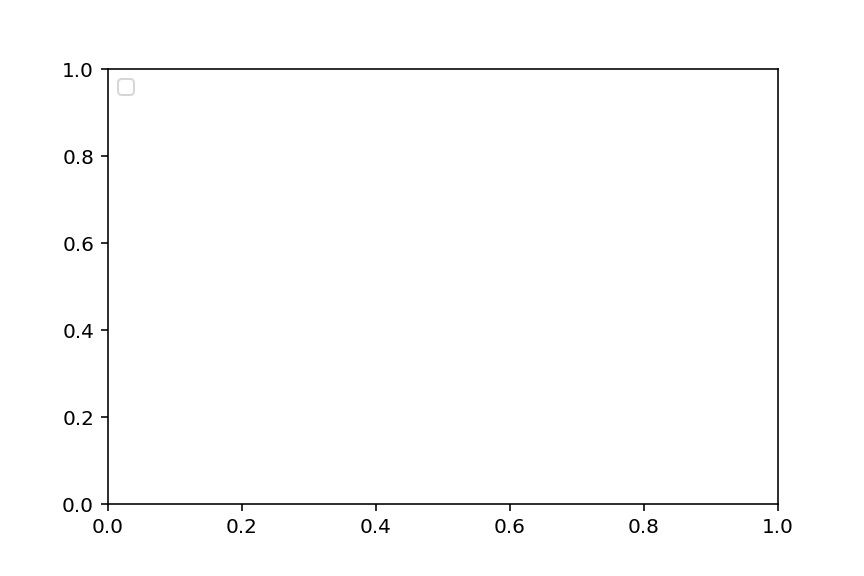

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


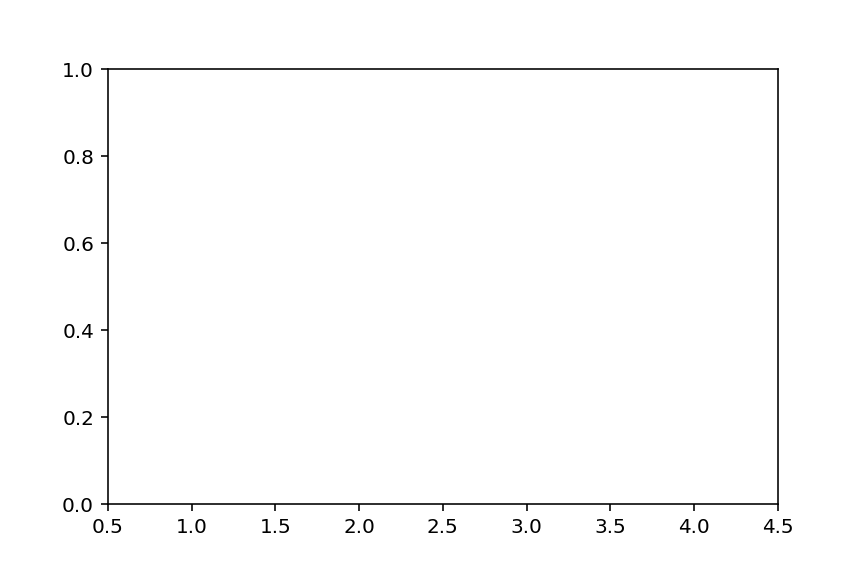

In [23]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


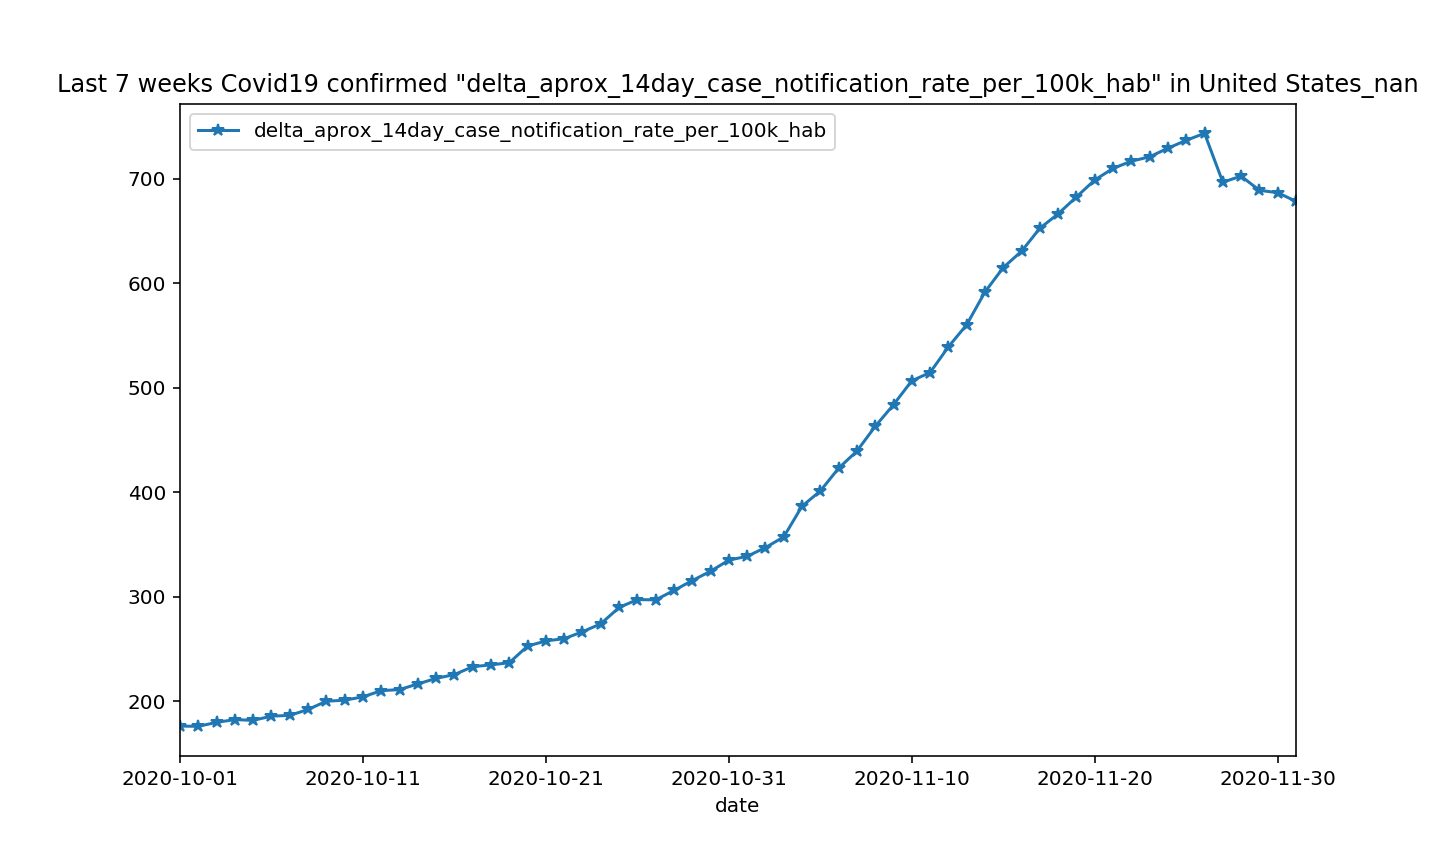

In [25]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


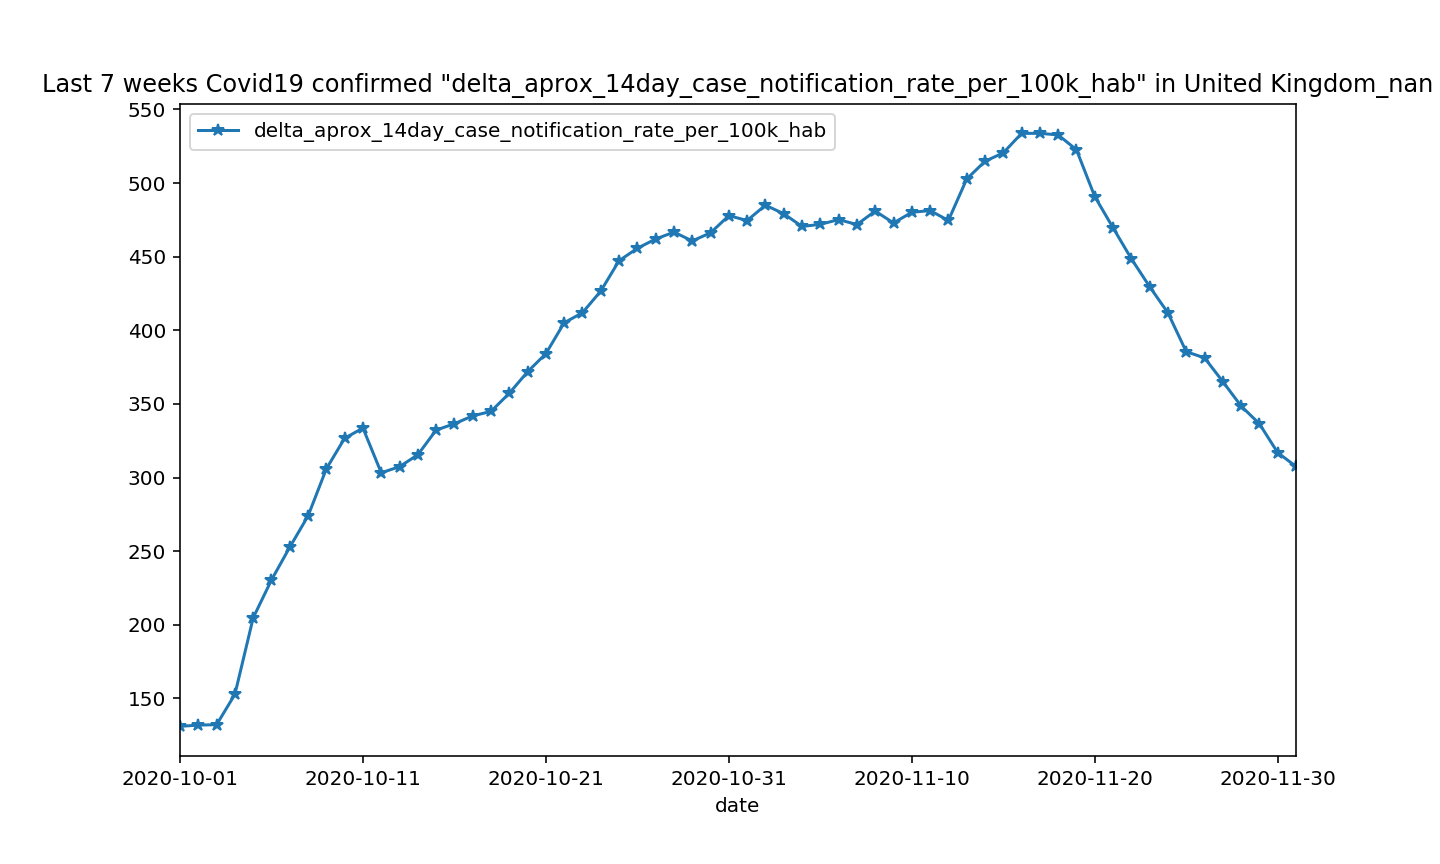

In [26]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


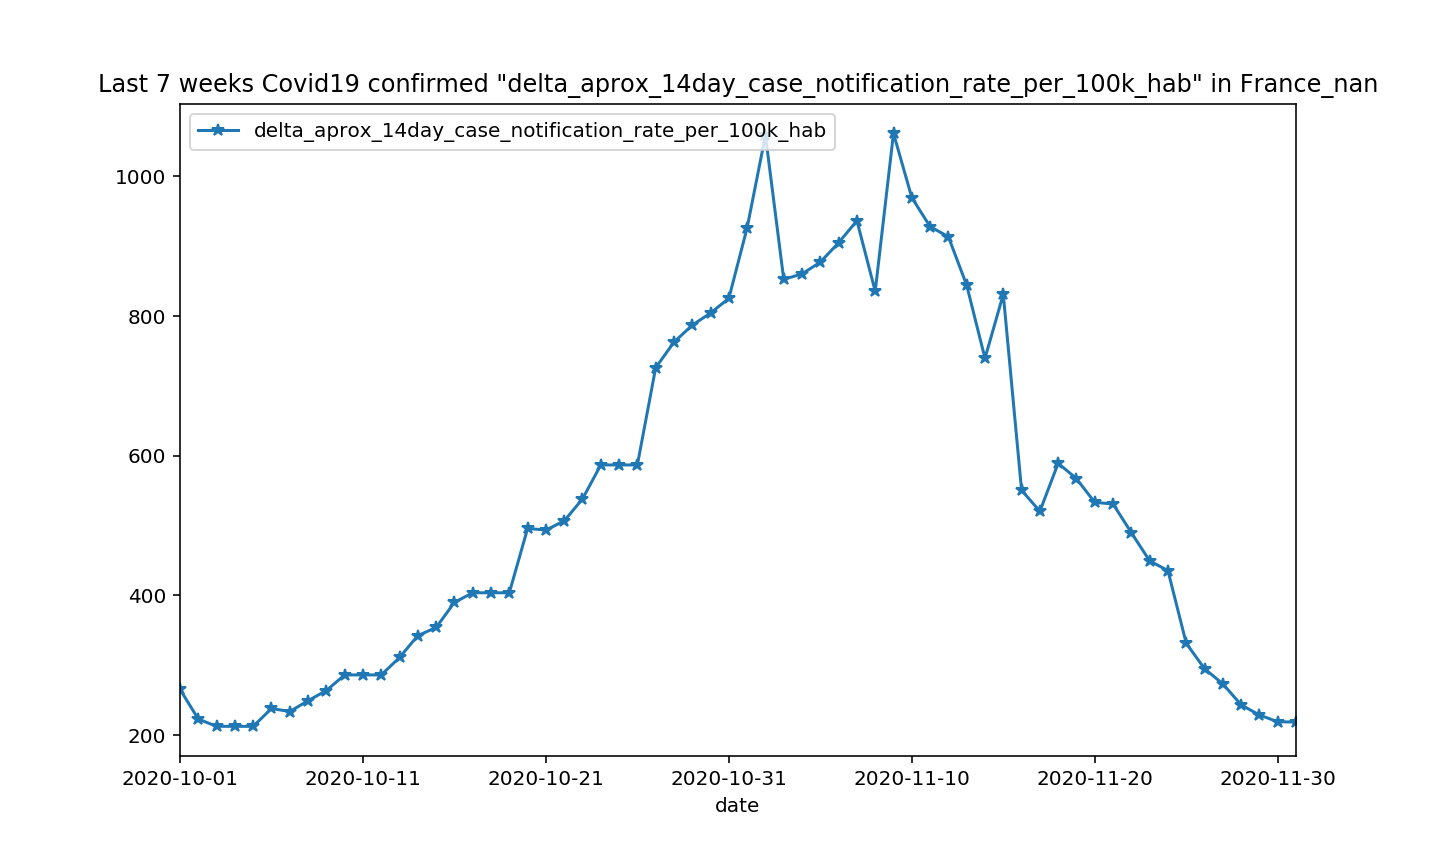

In [27]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


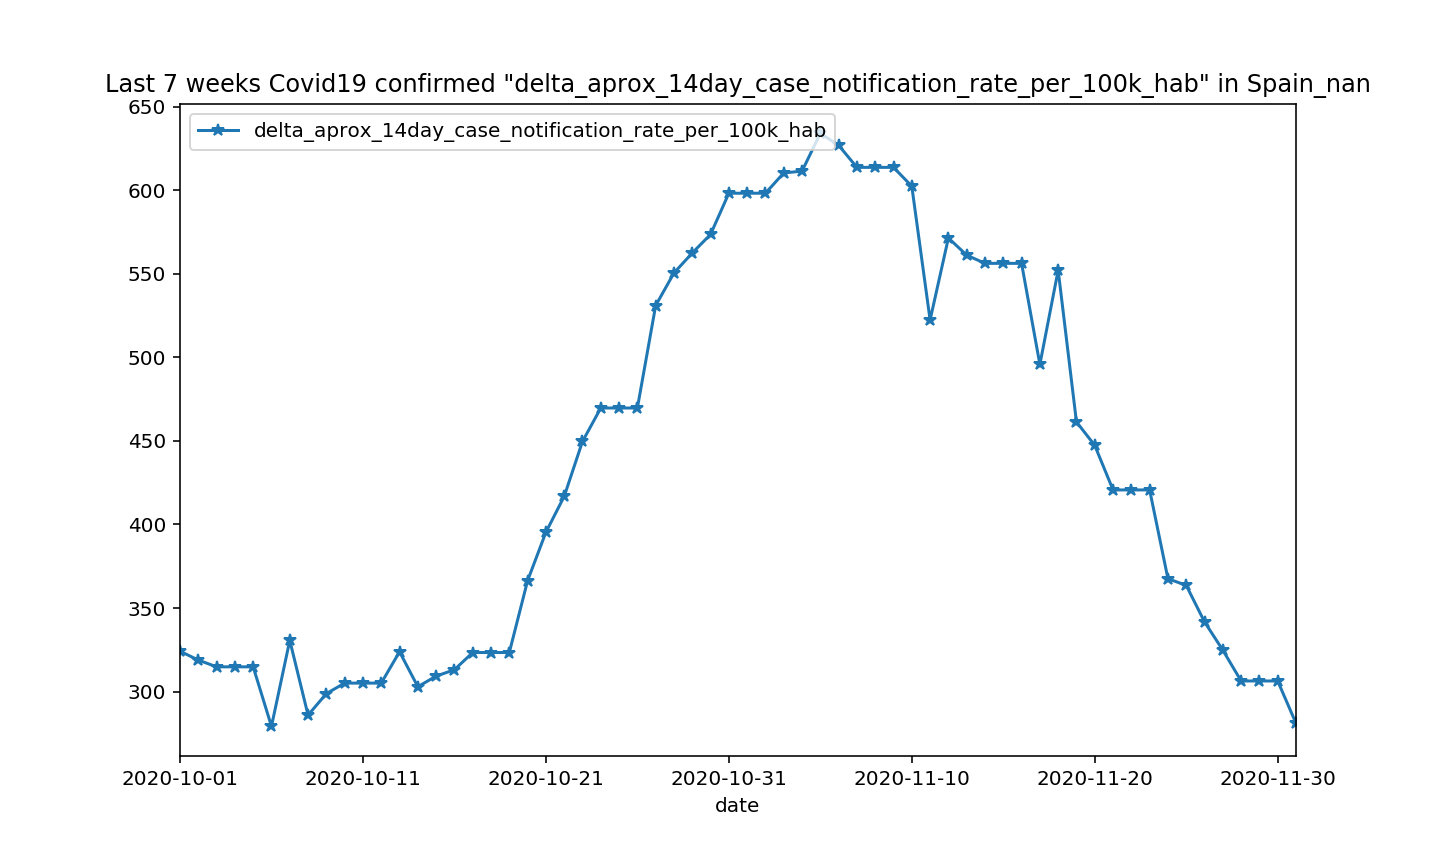

In [28]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


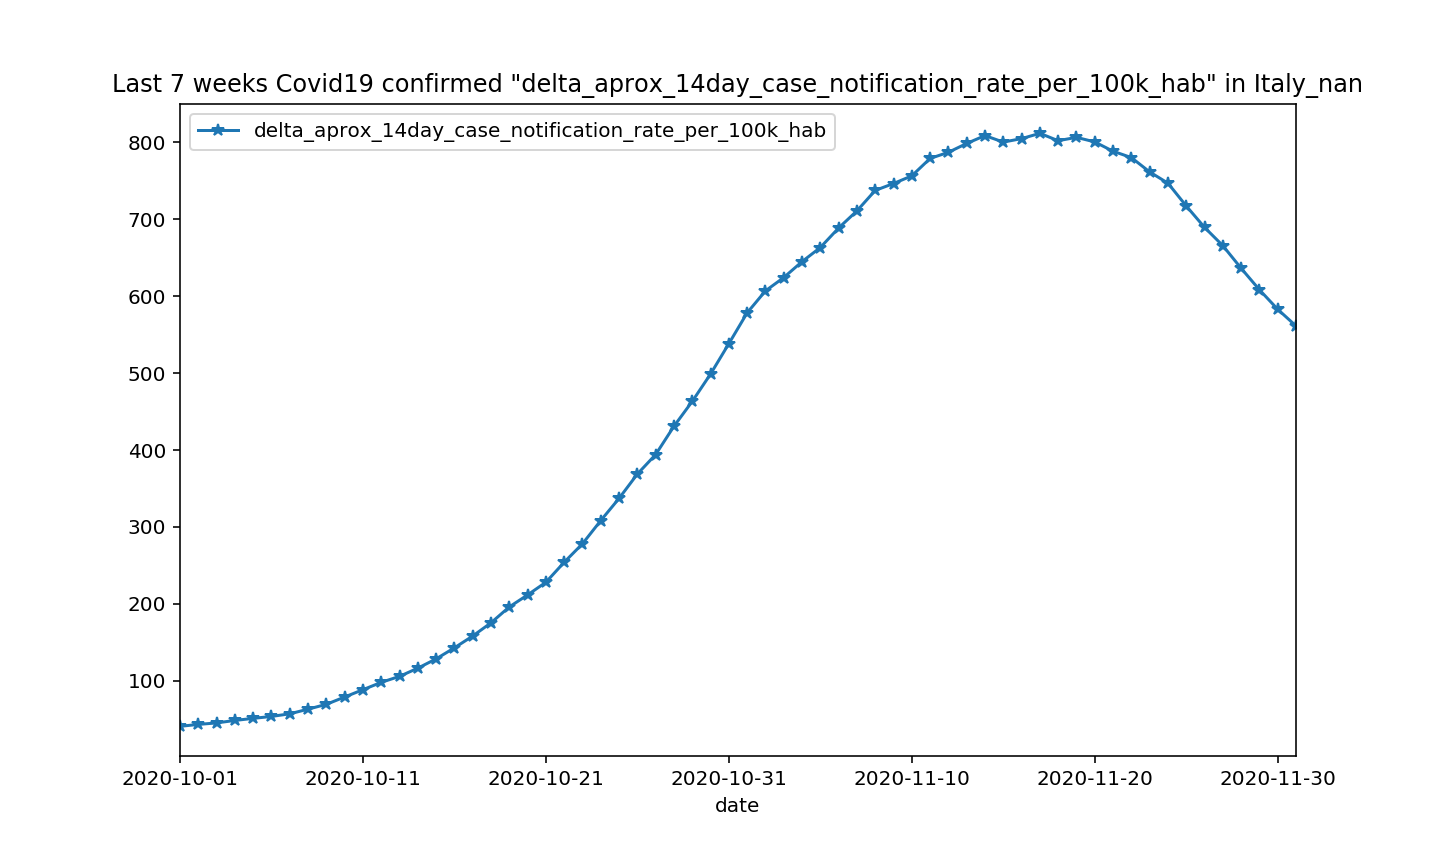

In [29]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


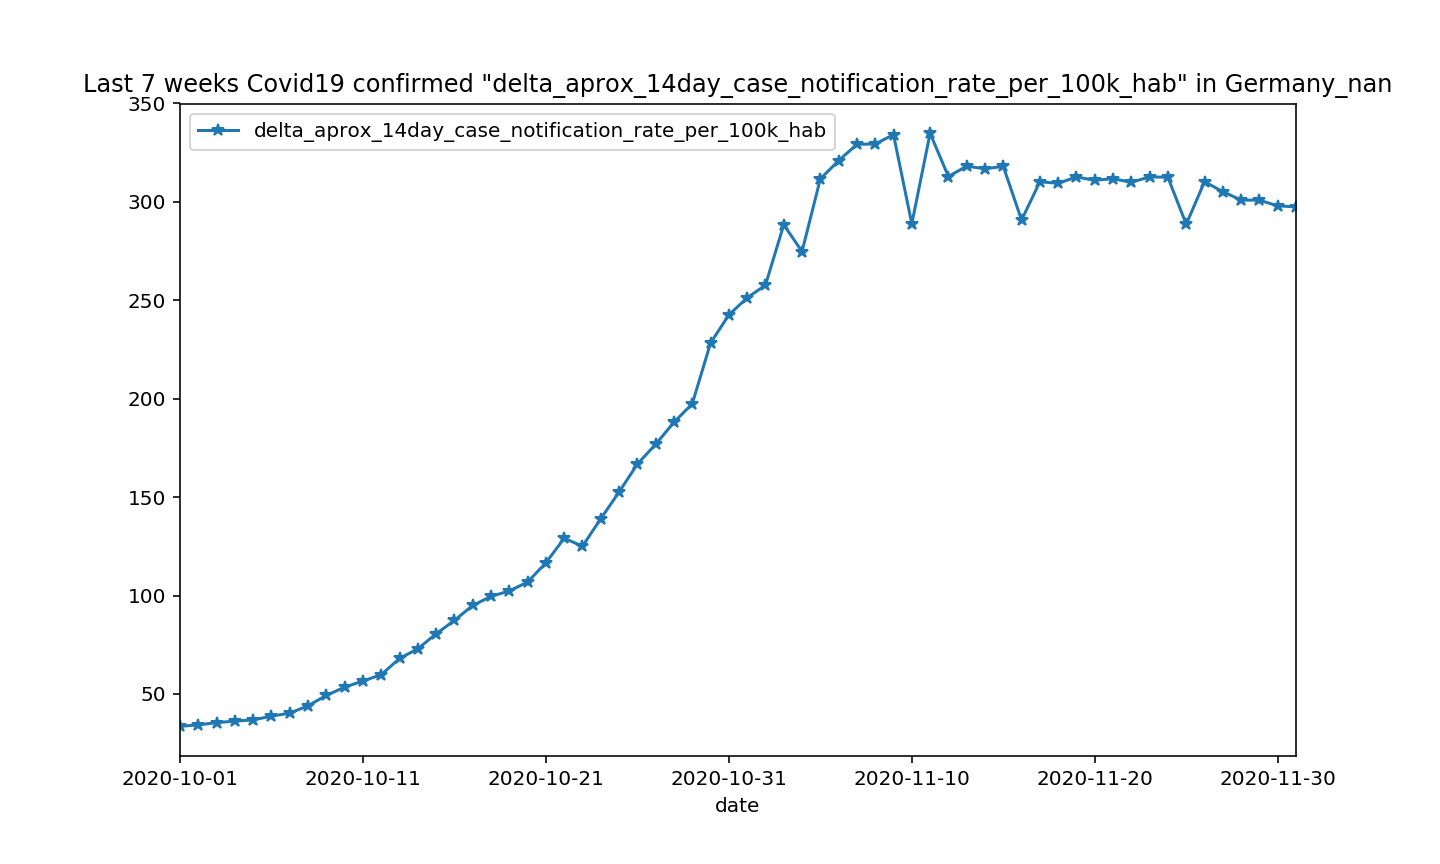

In [30]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


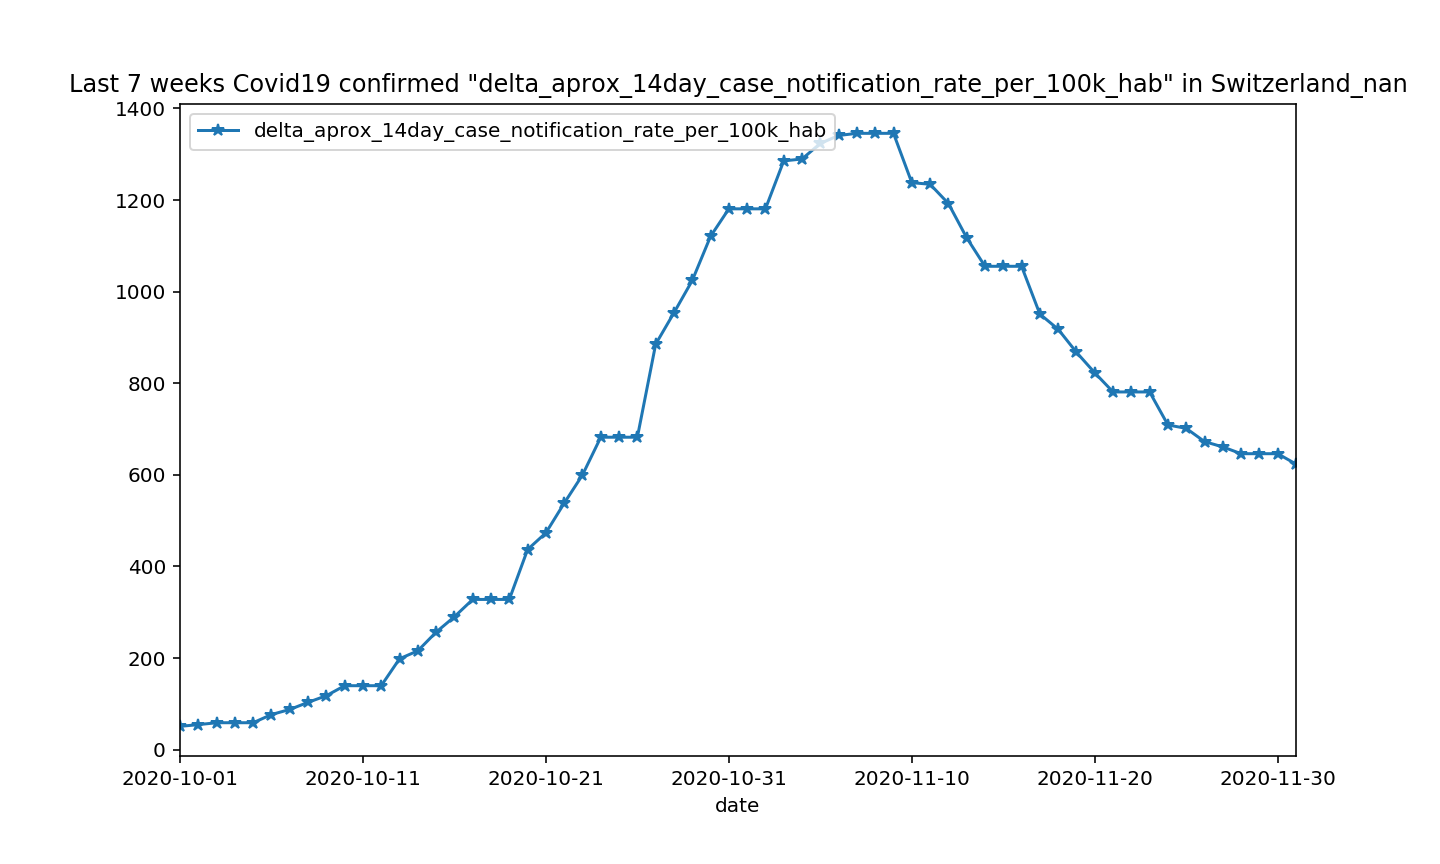

In [31]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


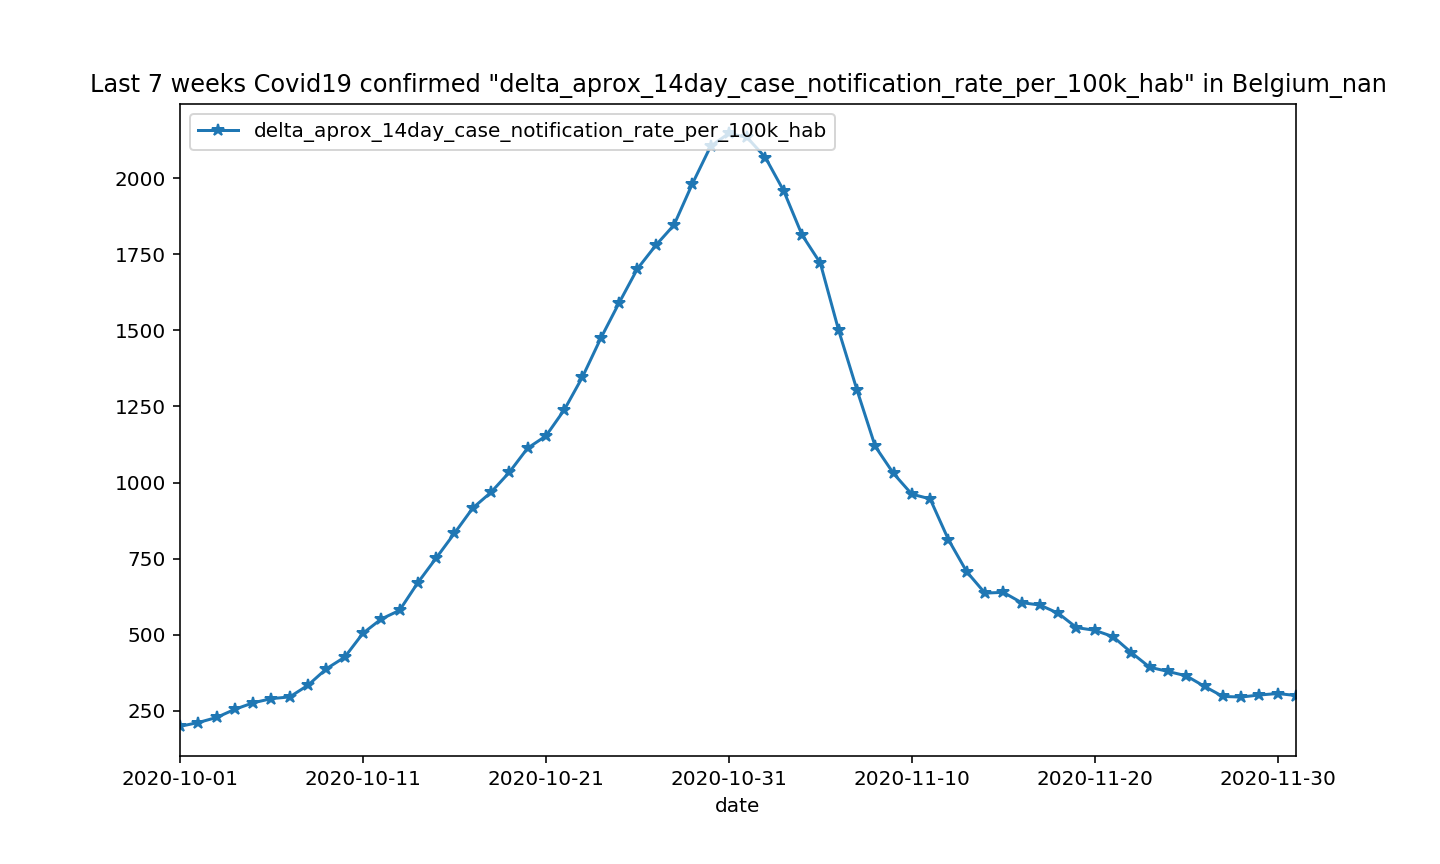

In [32]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


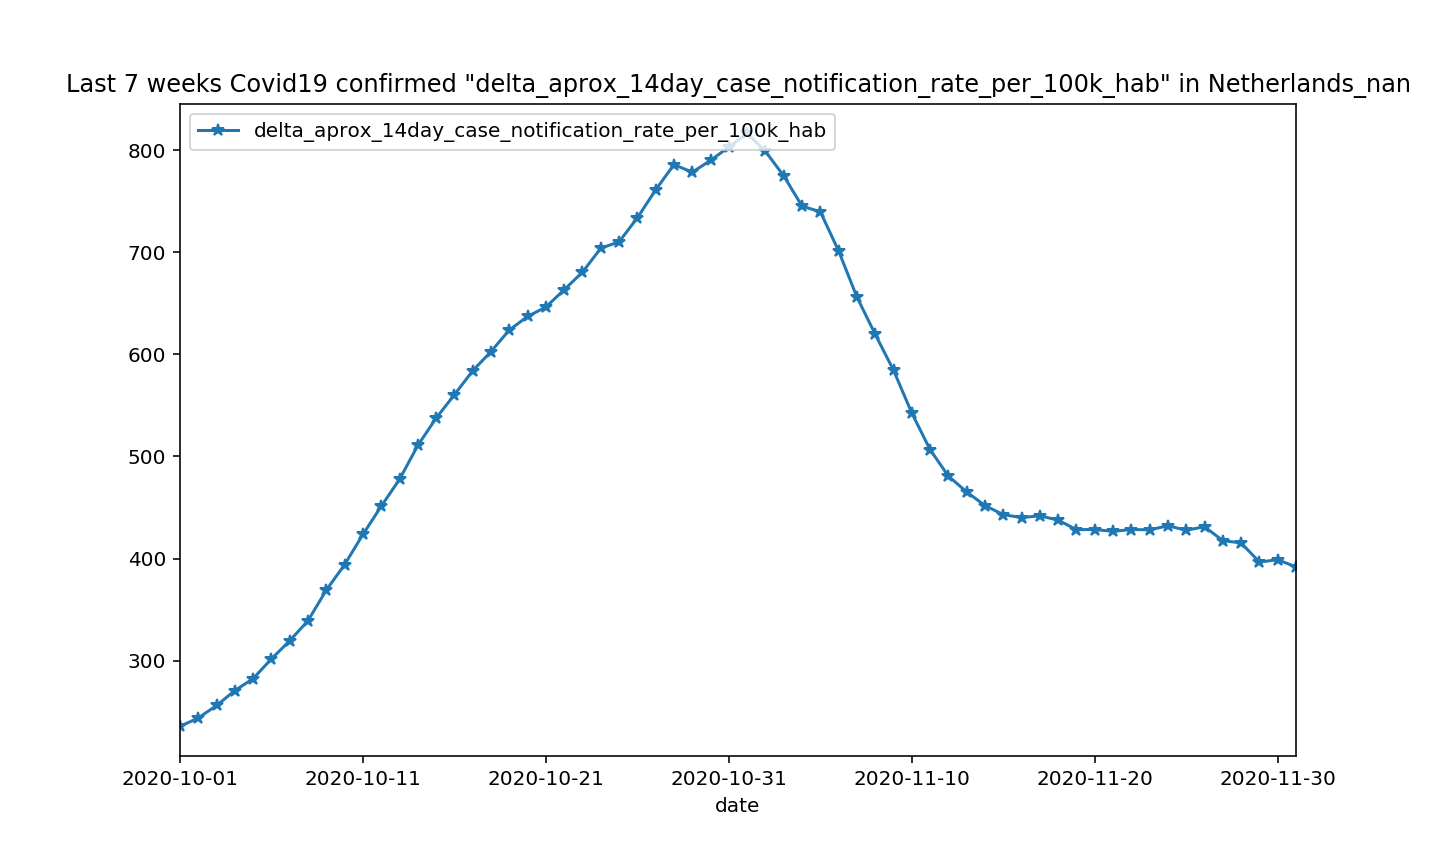

In [33]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


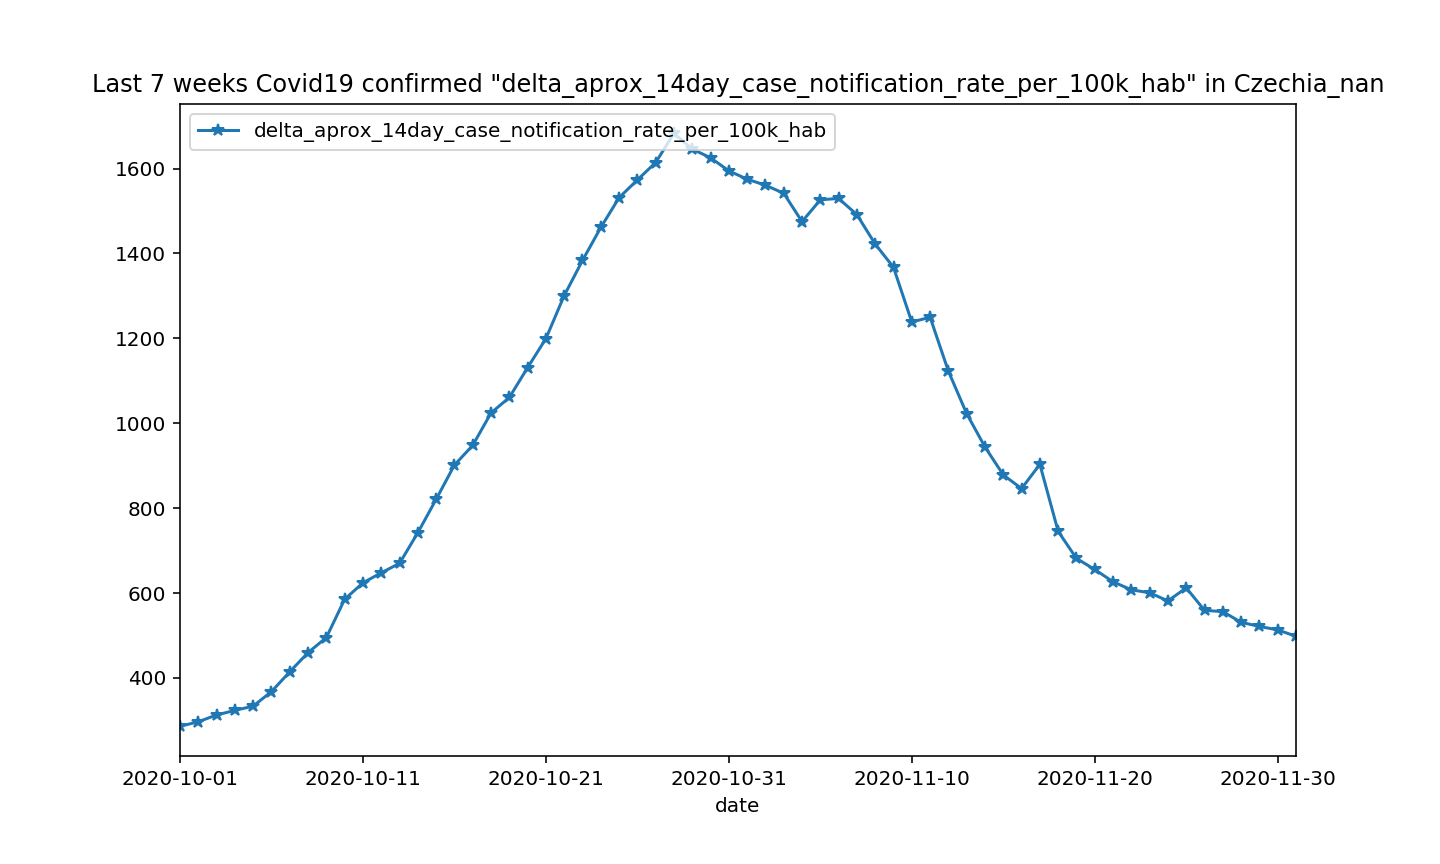

In [34]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


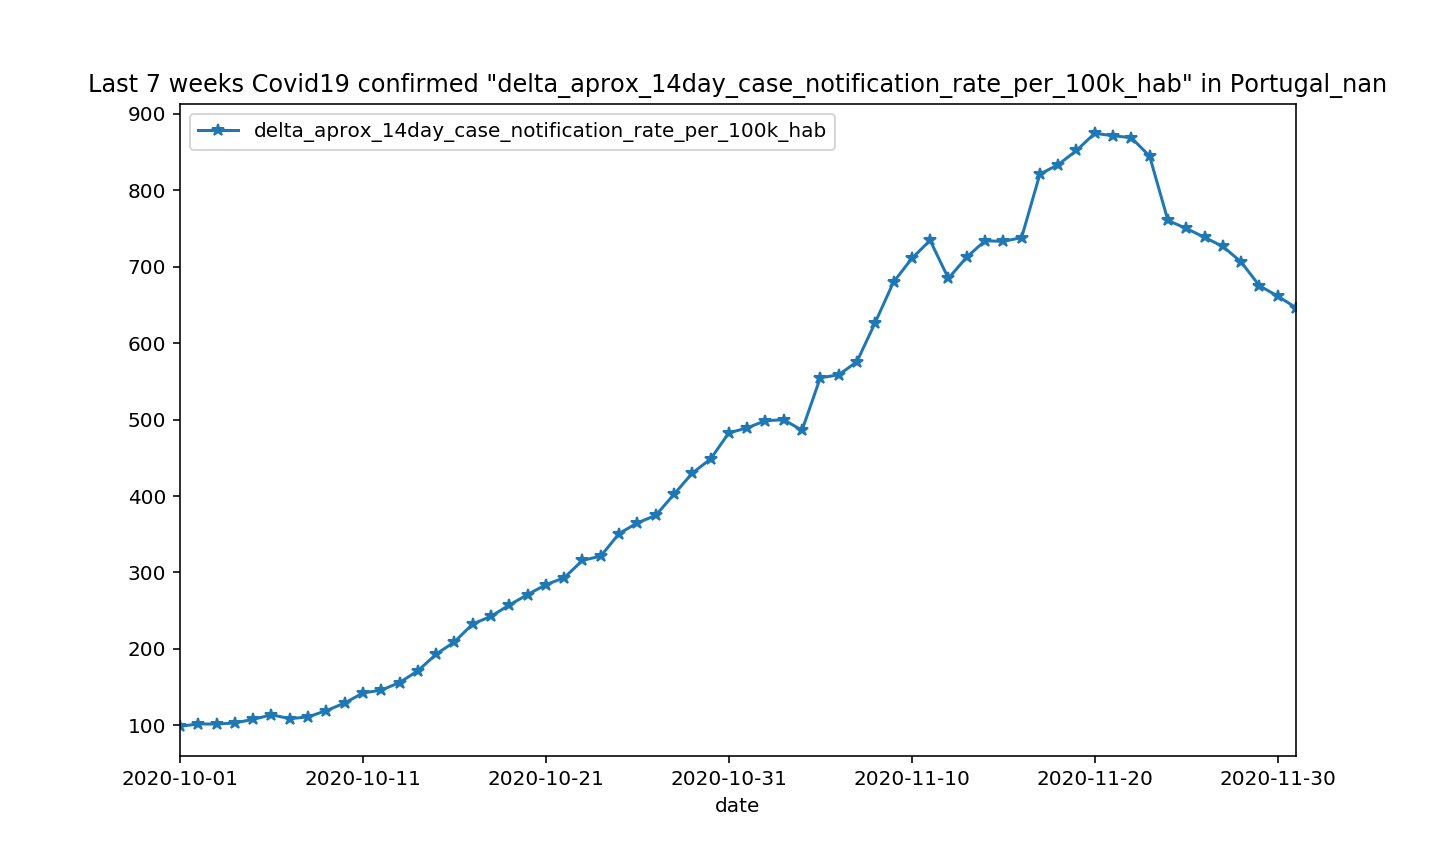

In [35]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [36]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


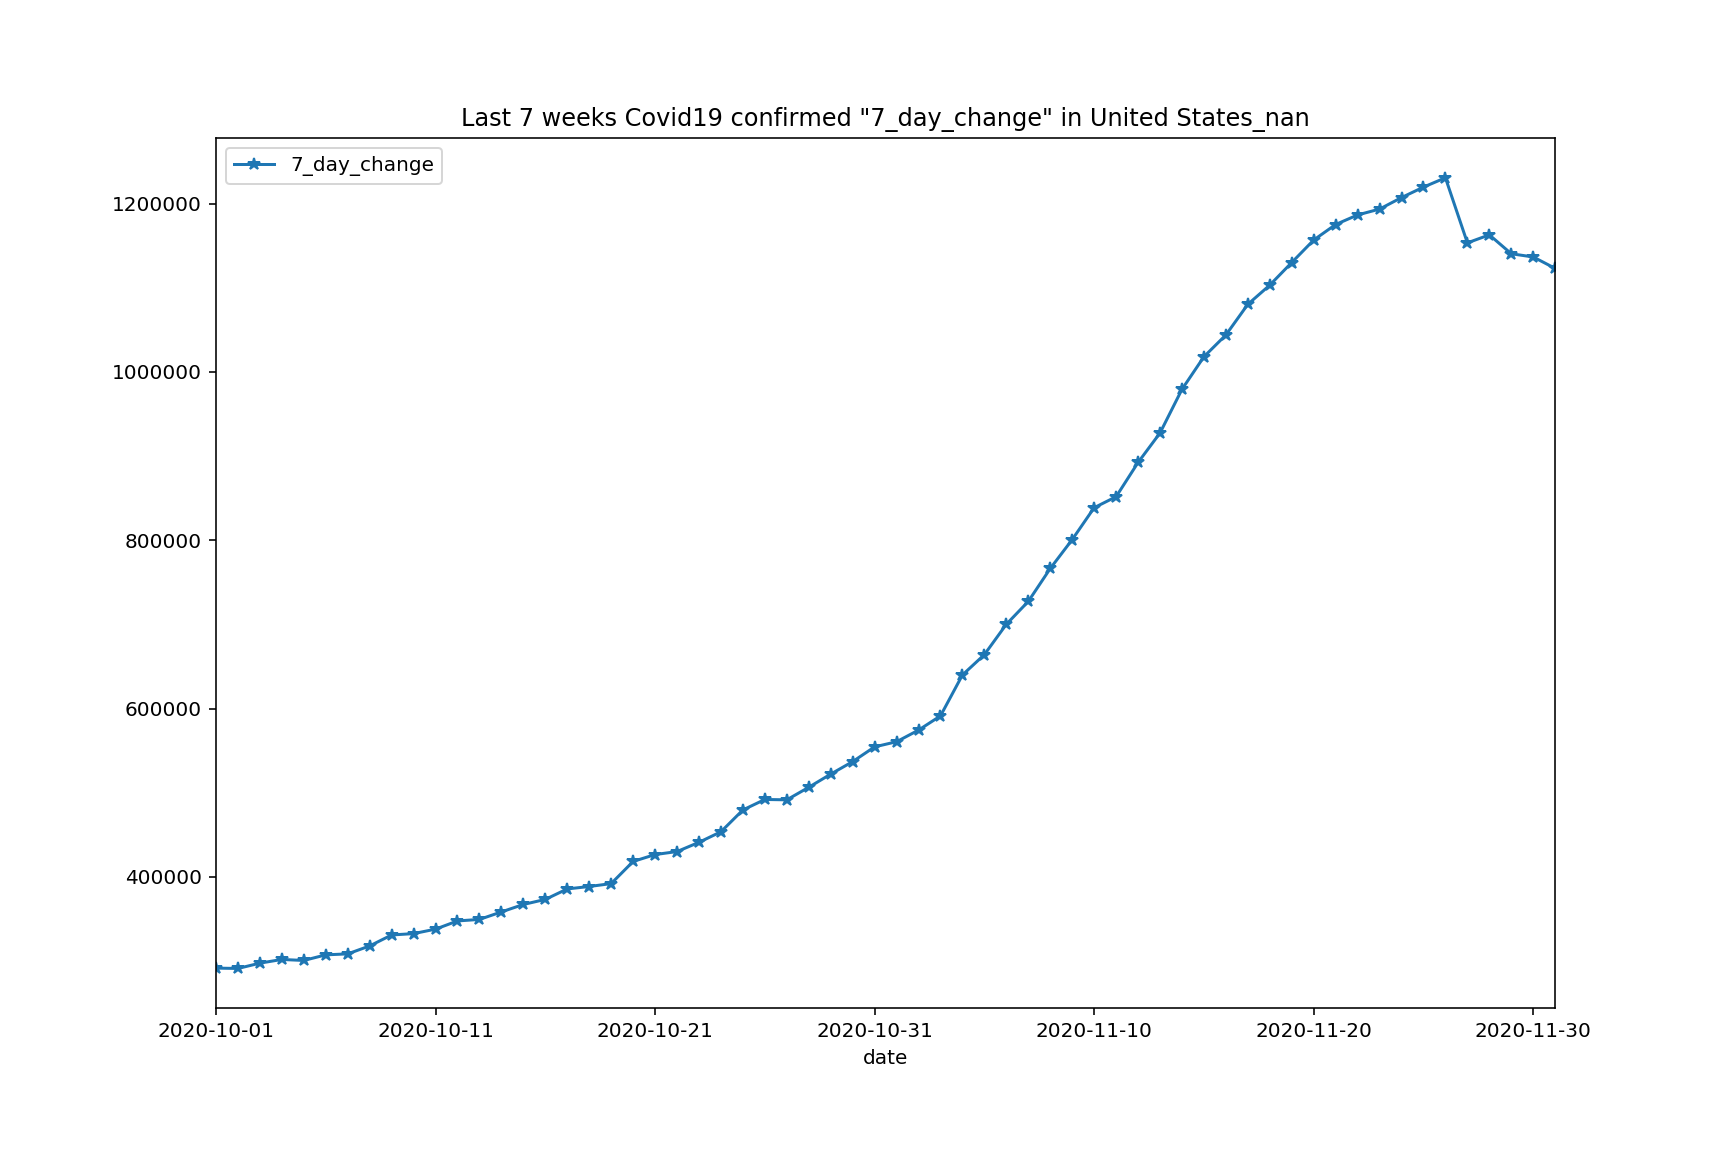

In [37]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


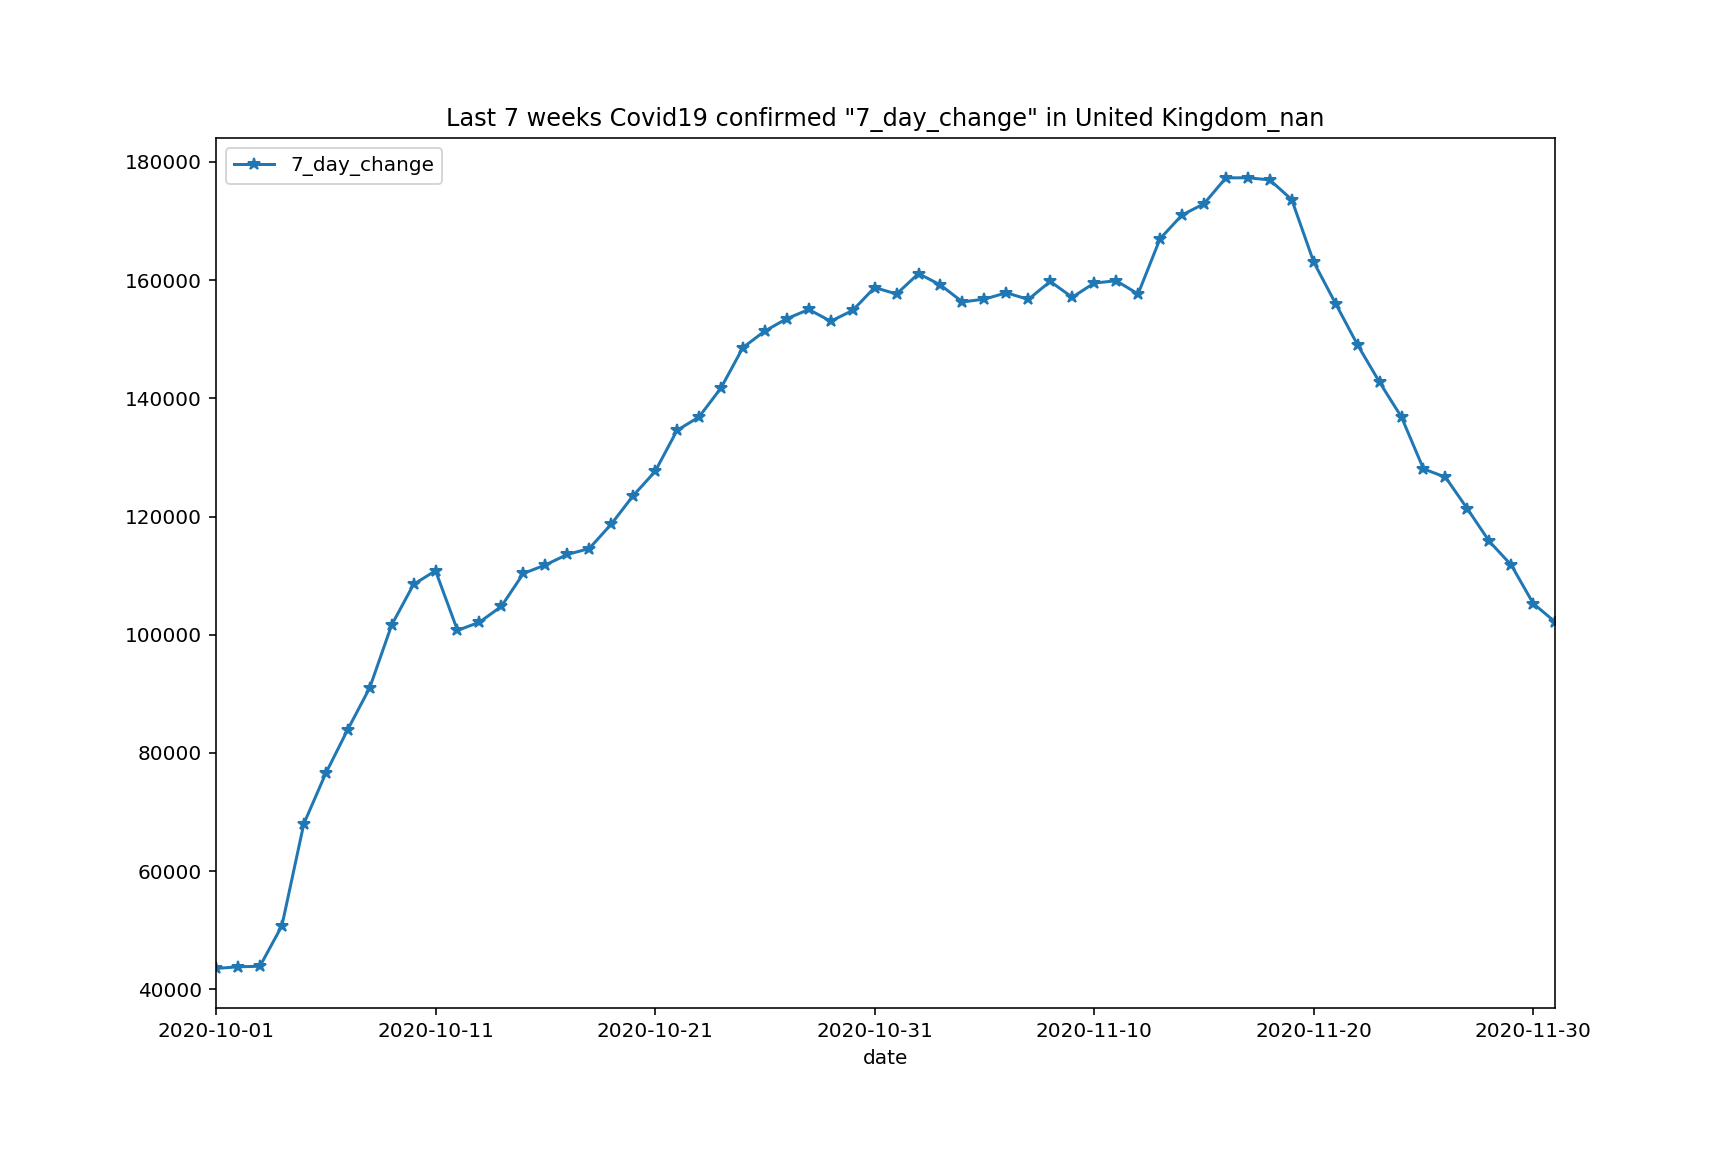

In [38]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


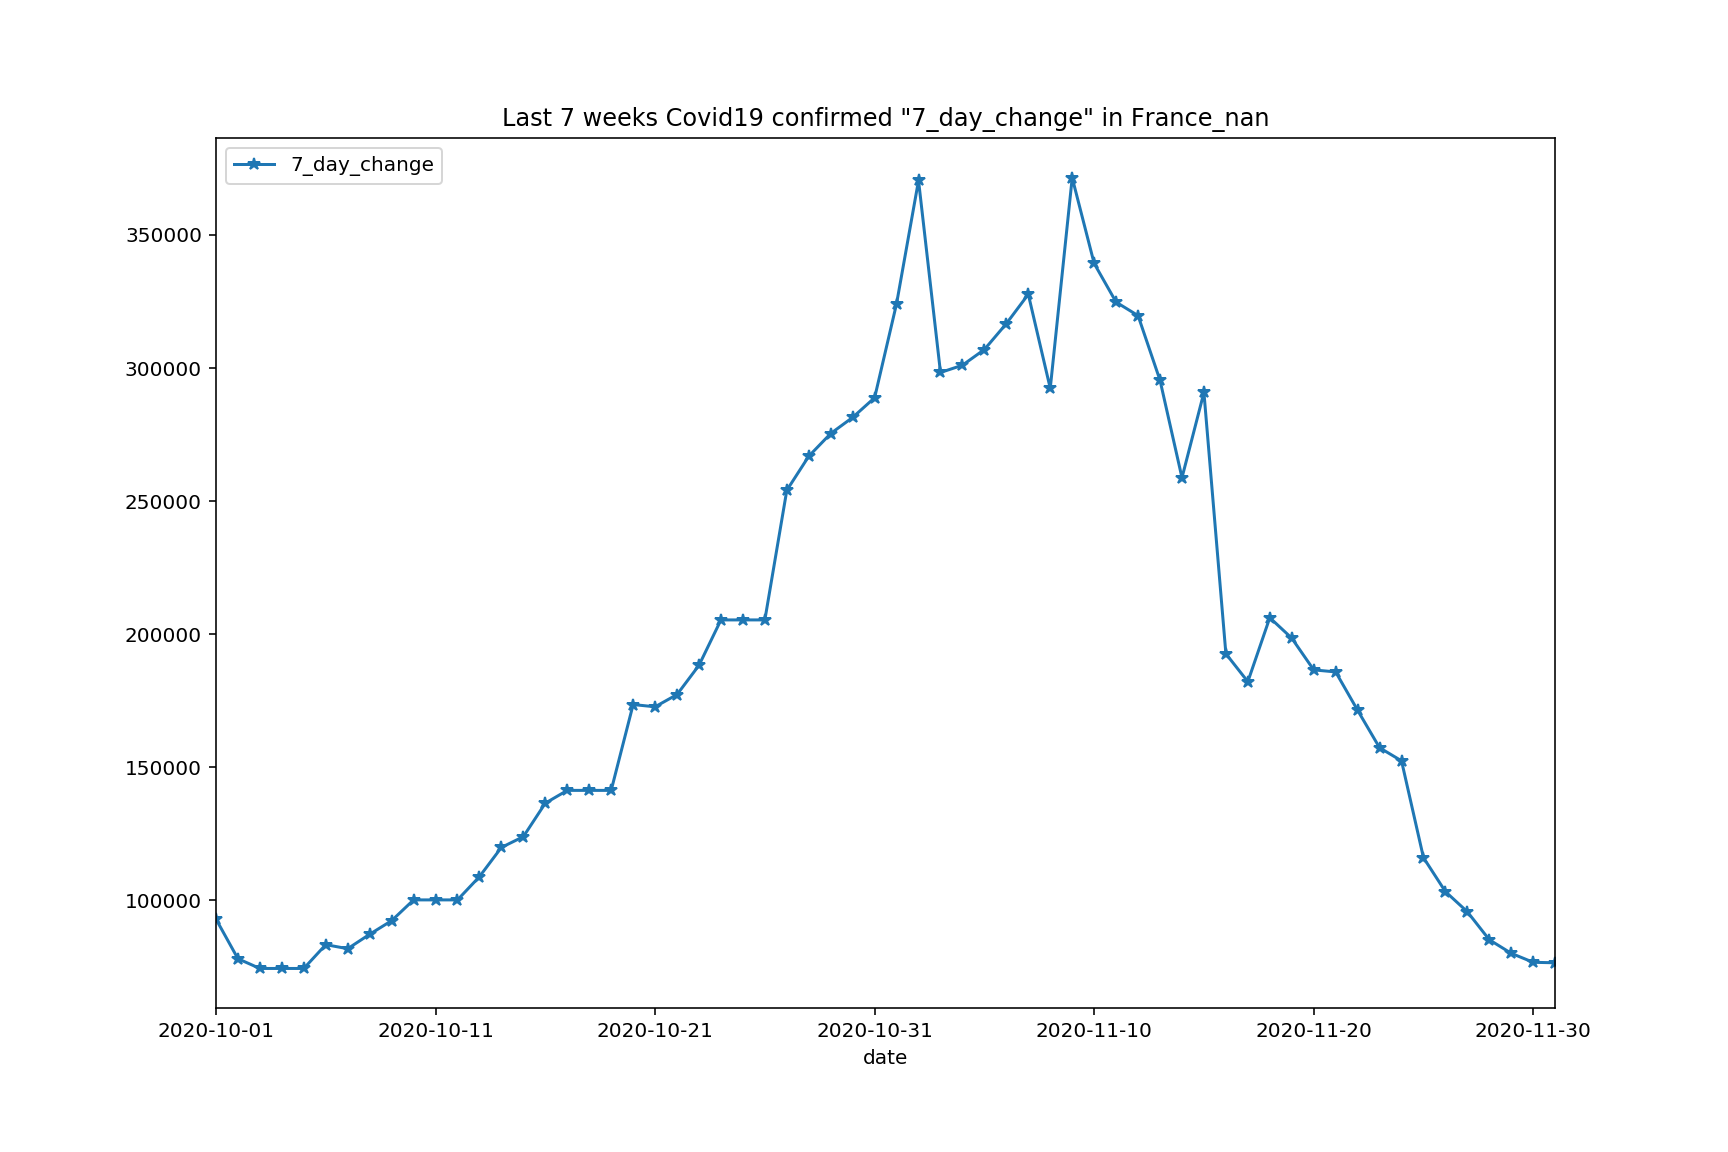

In [39]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


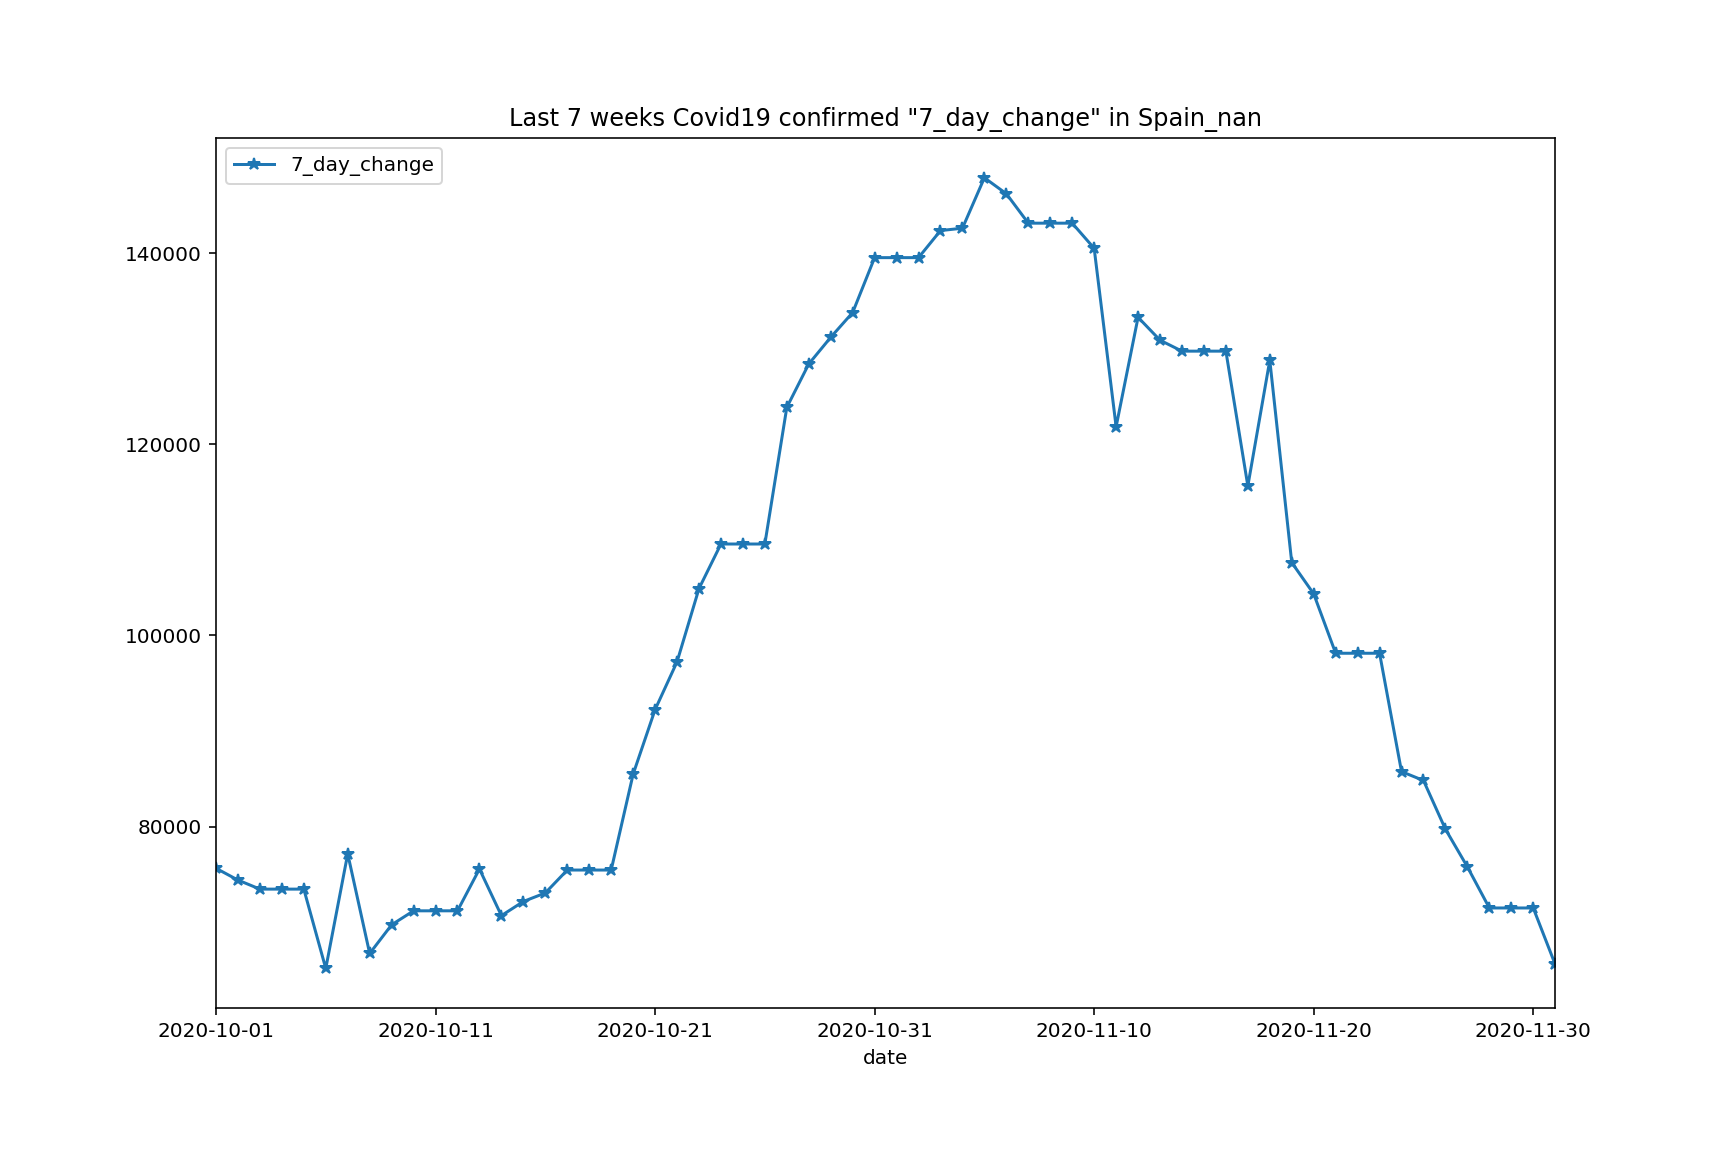

In [40]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


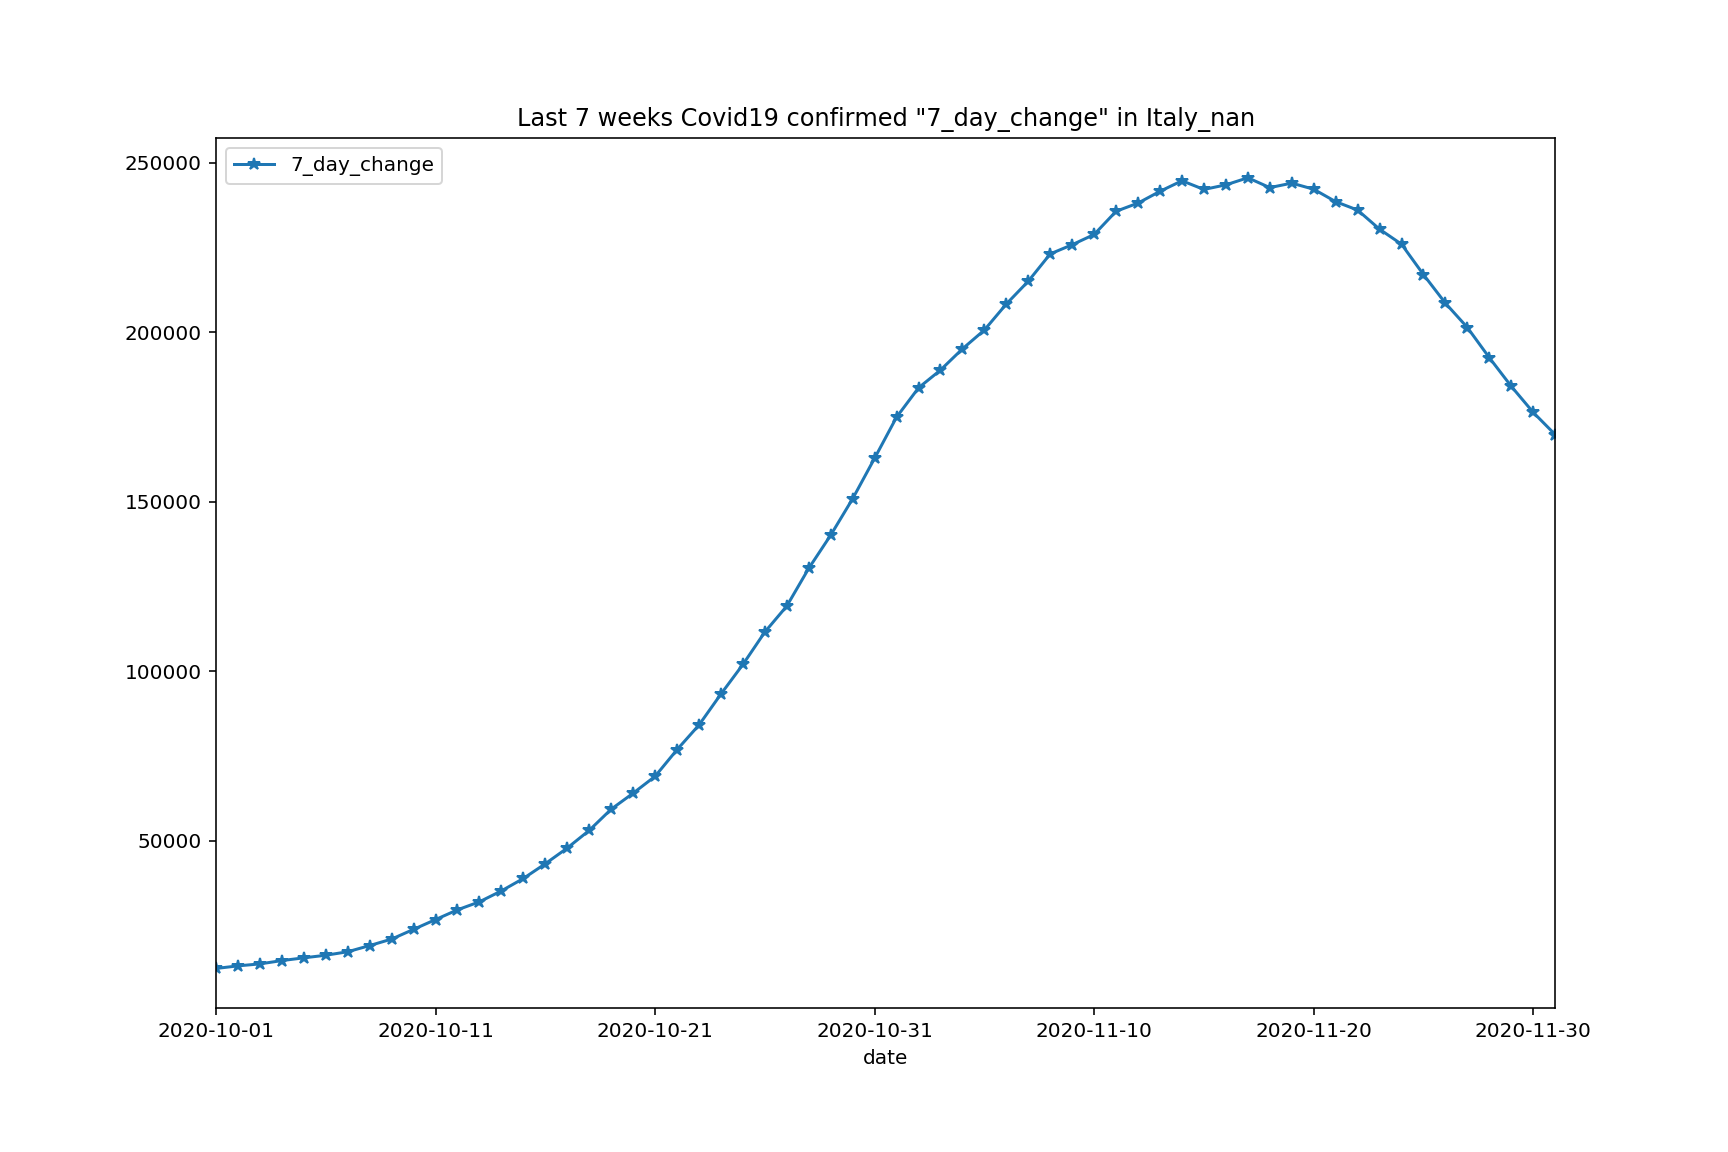

In [41]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


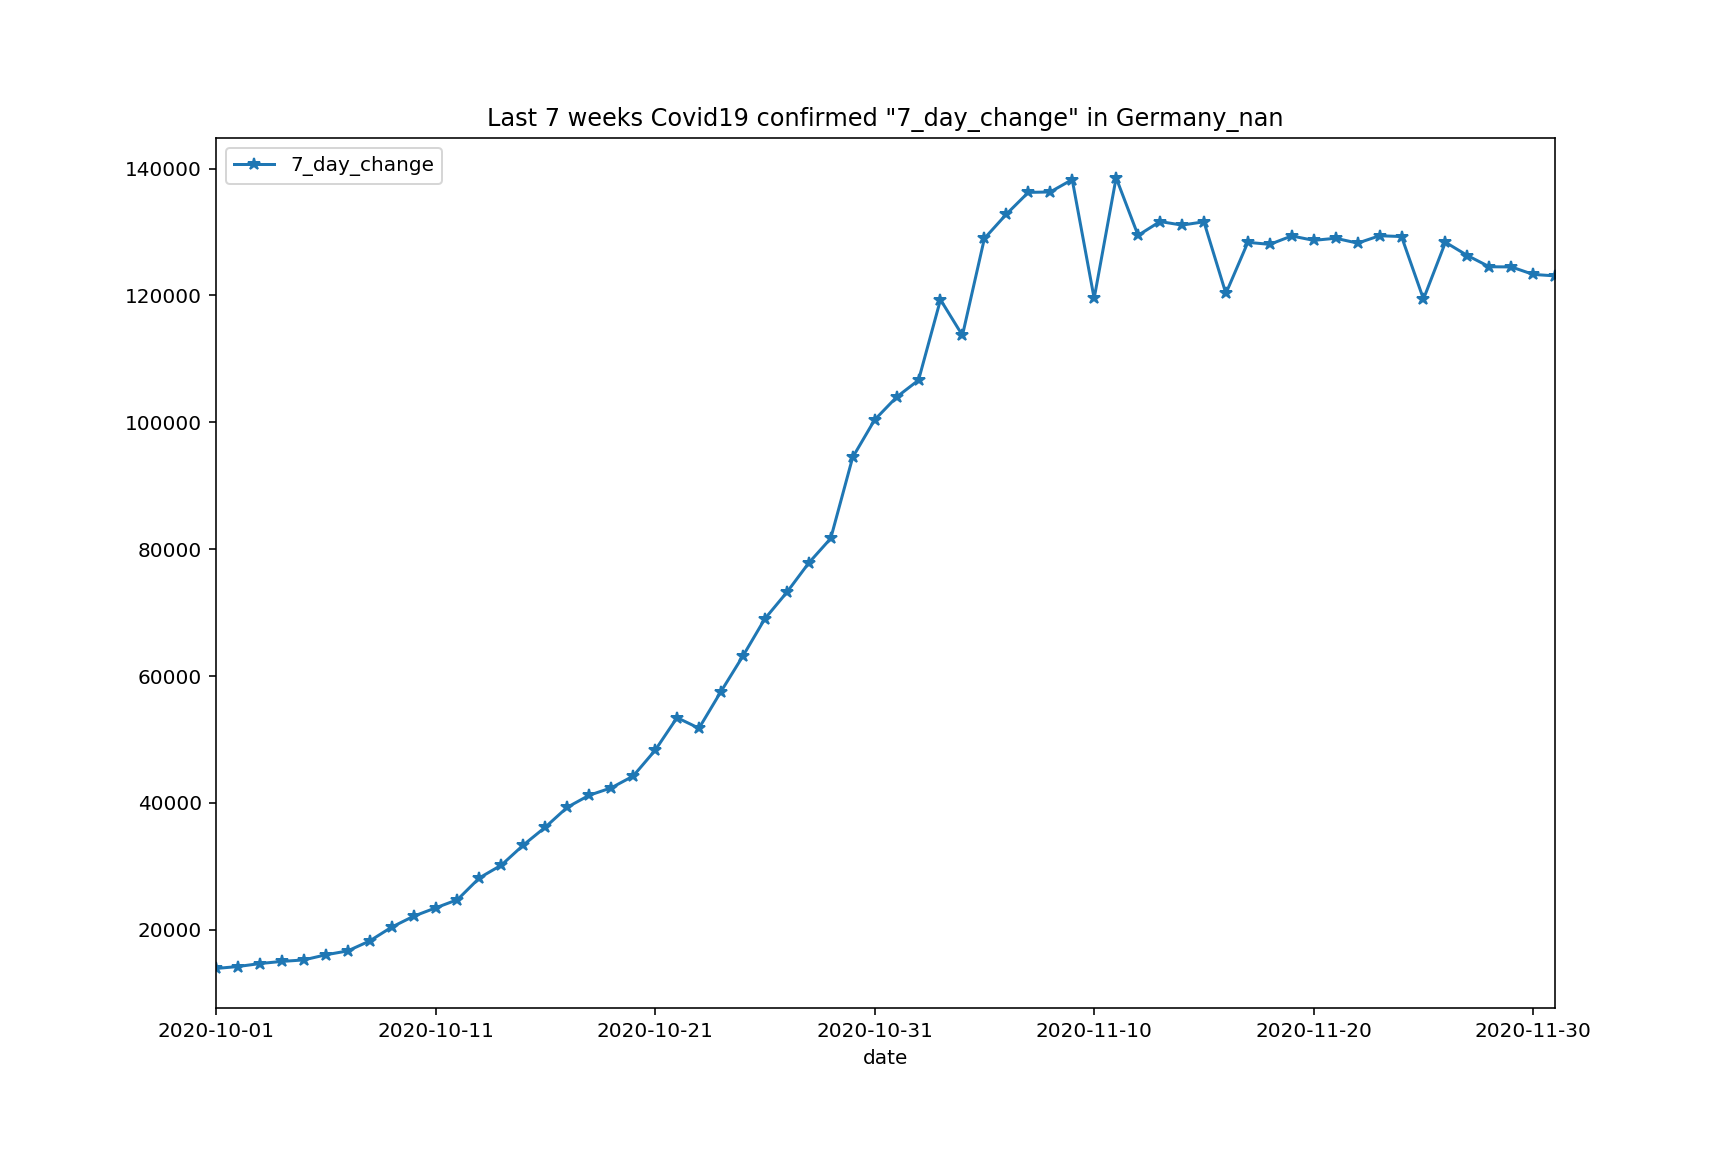

In [42]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


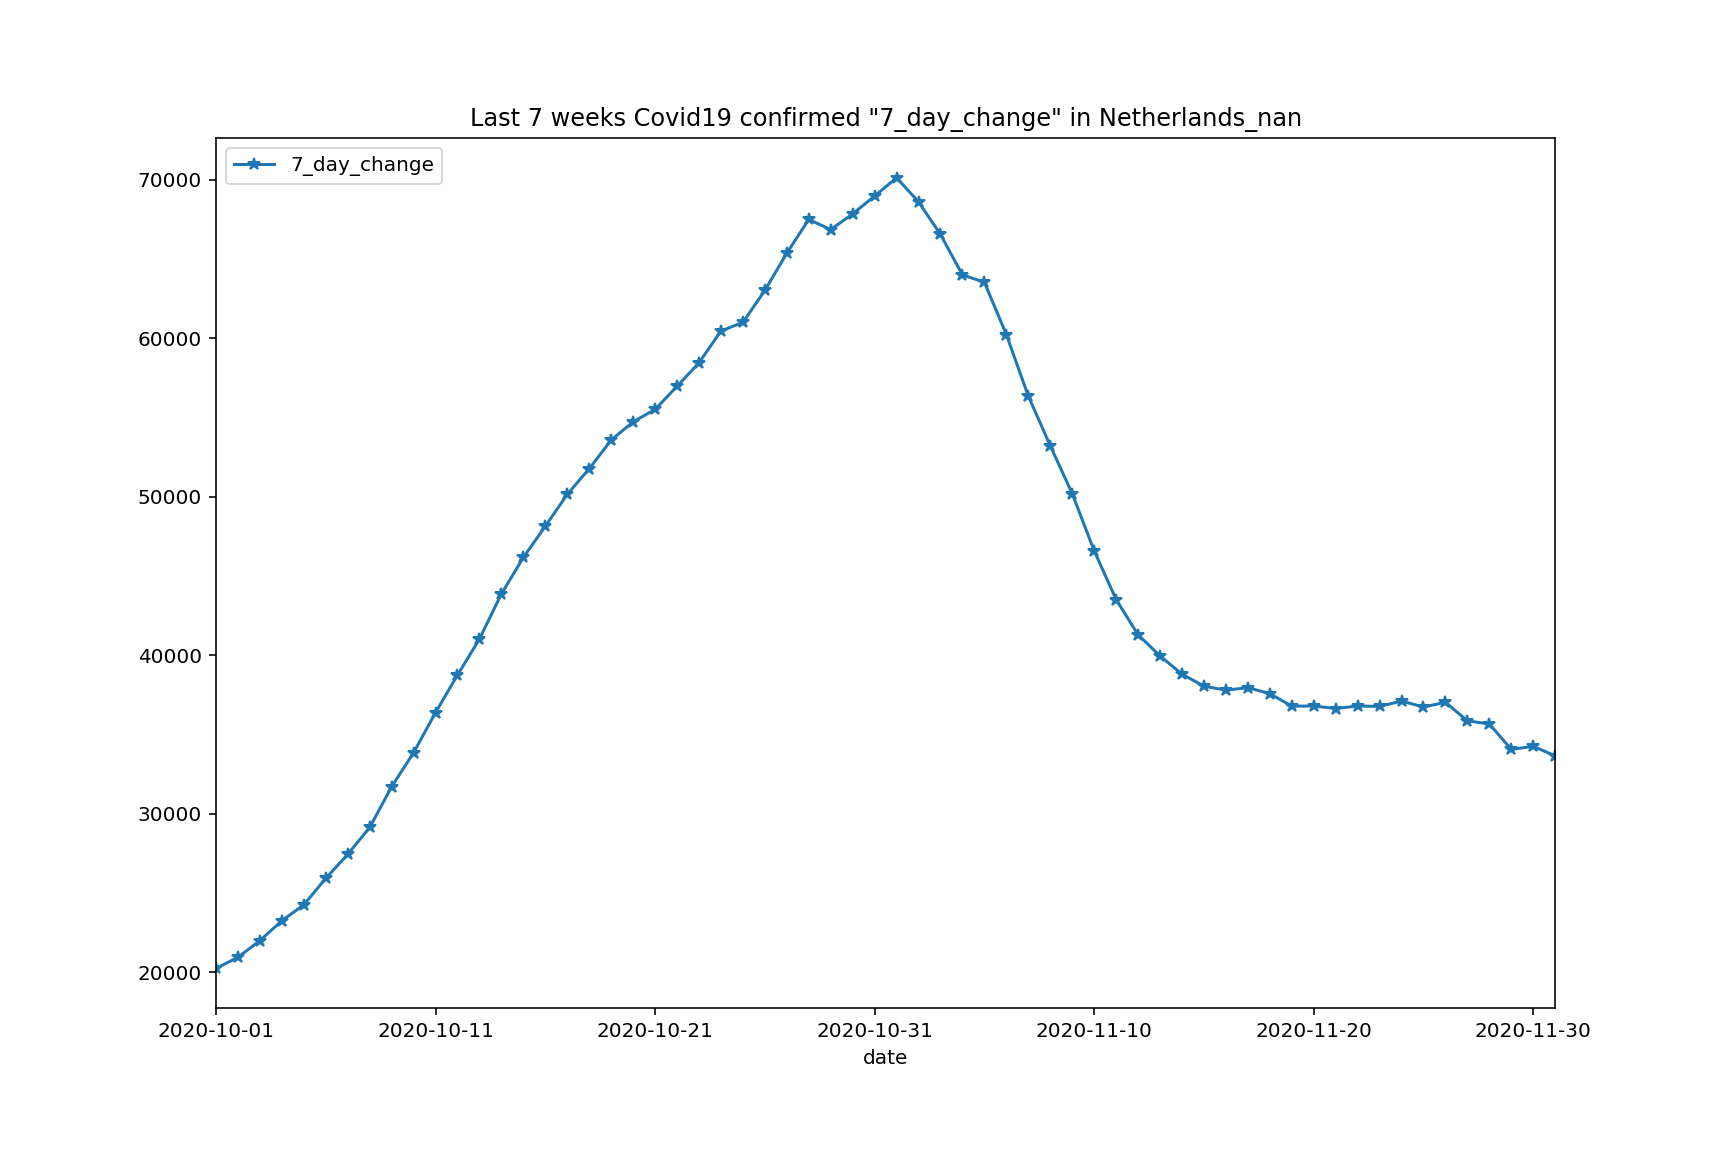

In [43]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


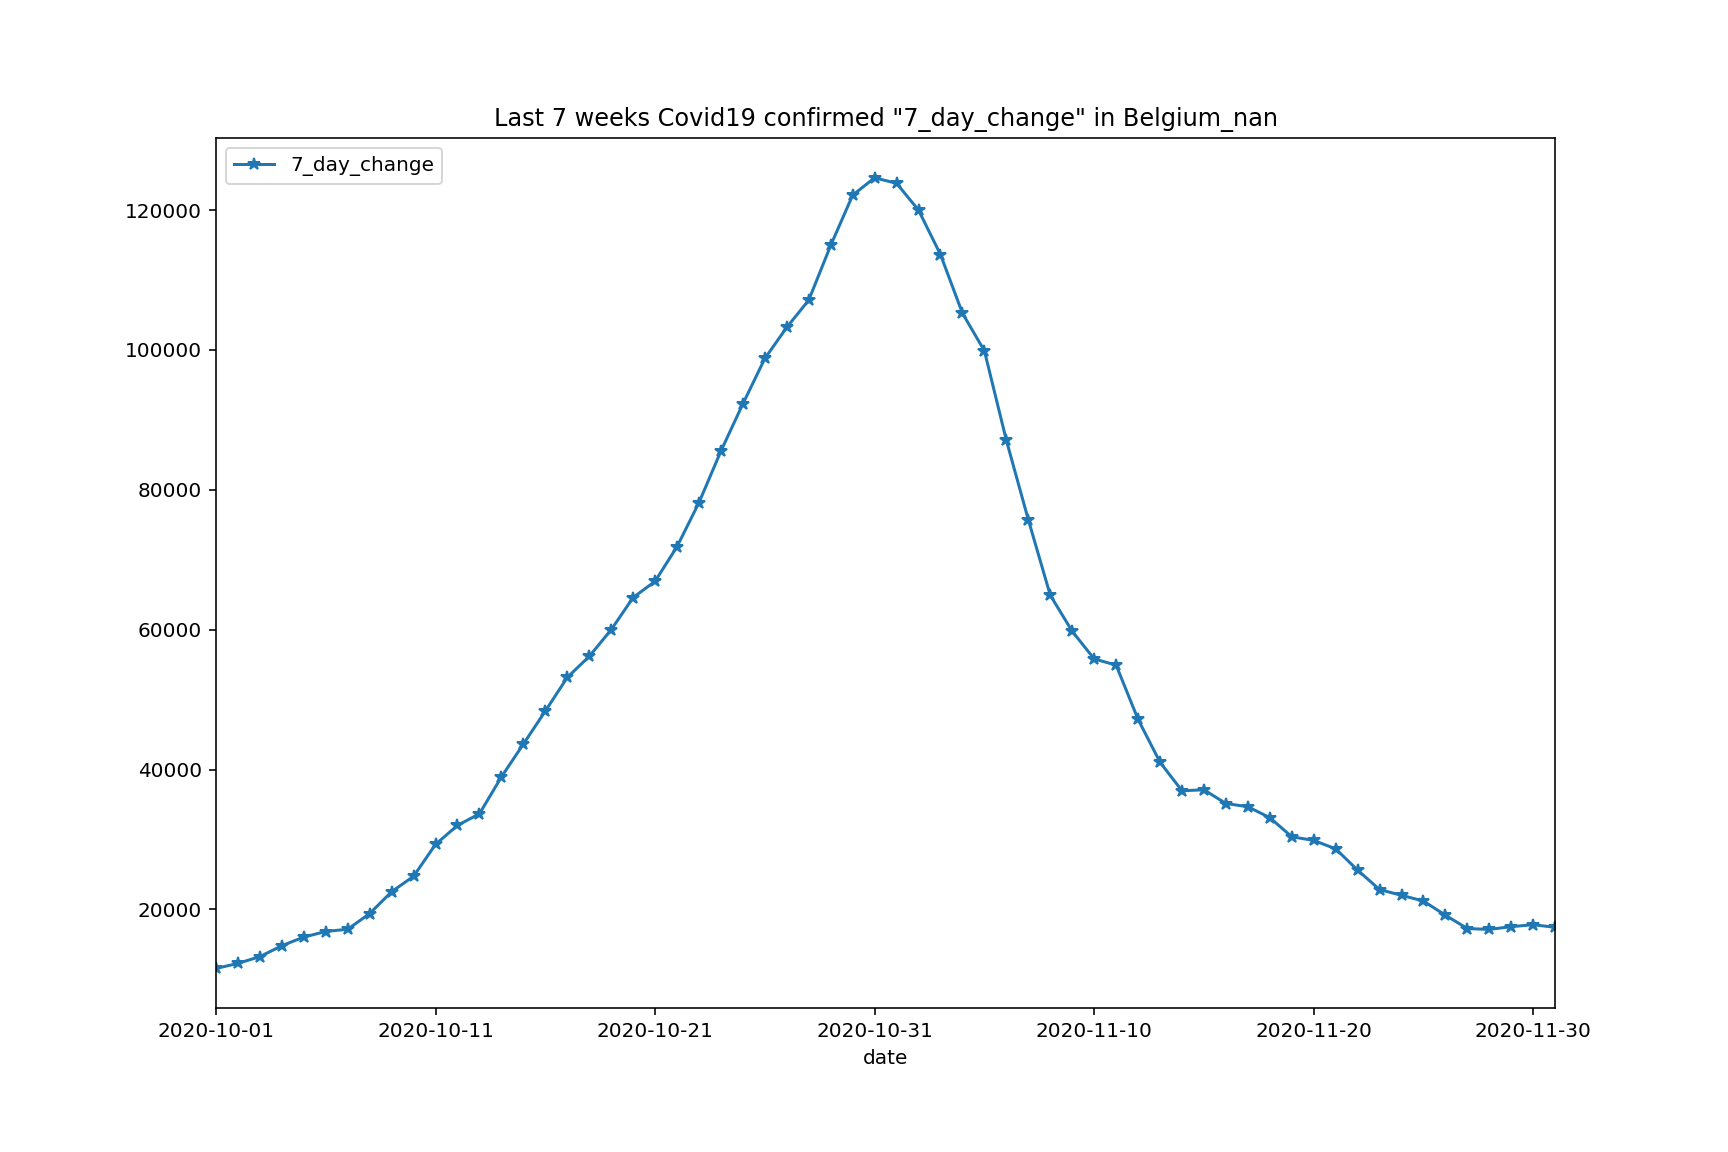

In [44]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


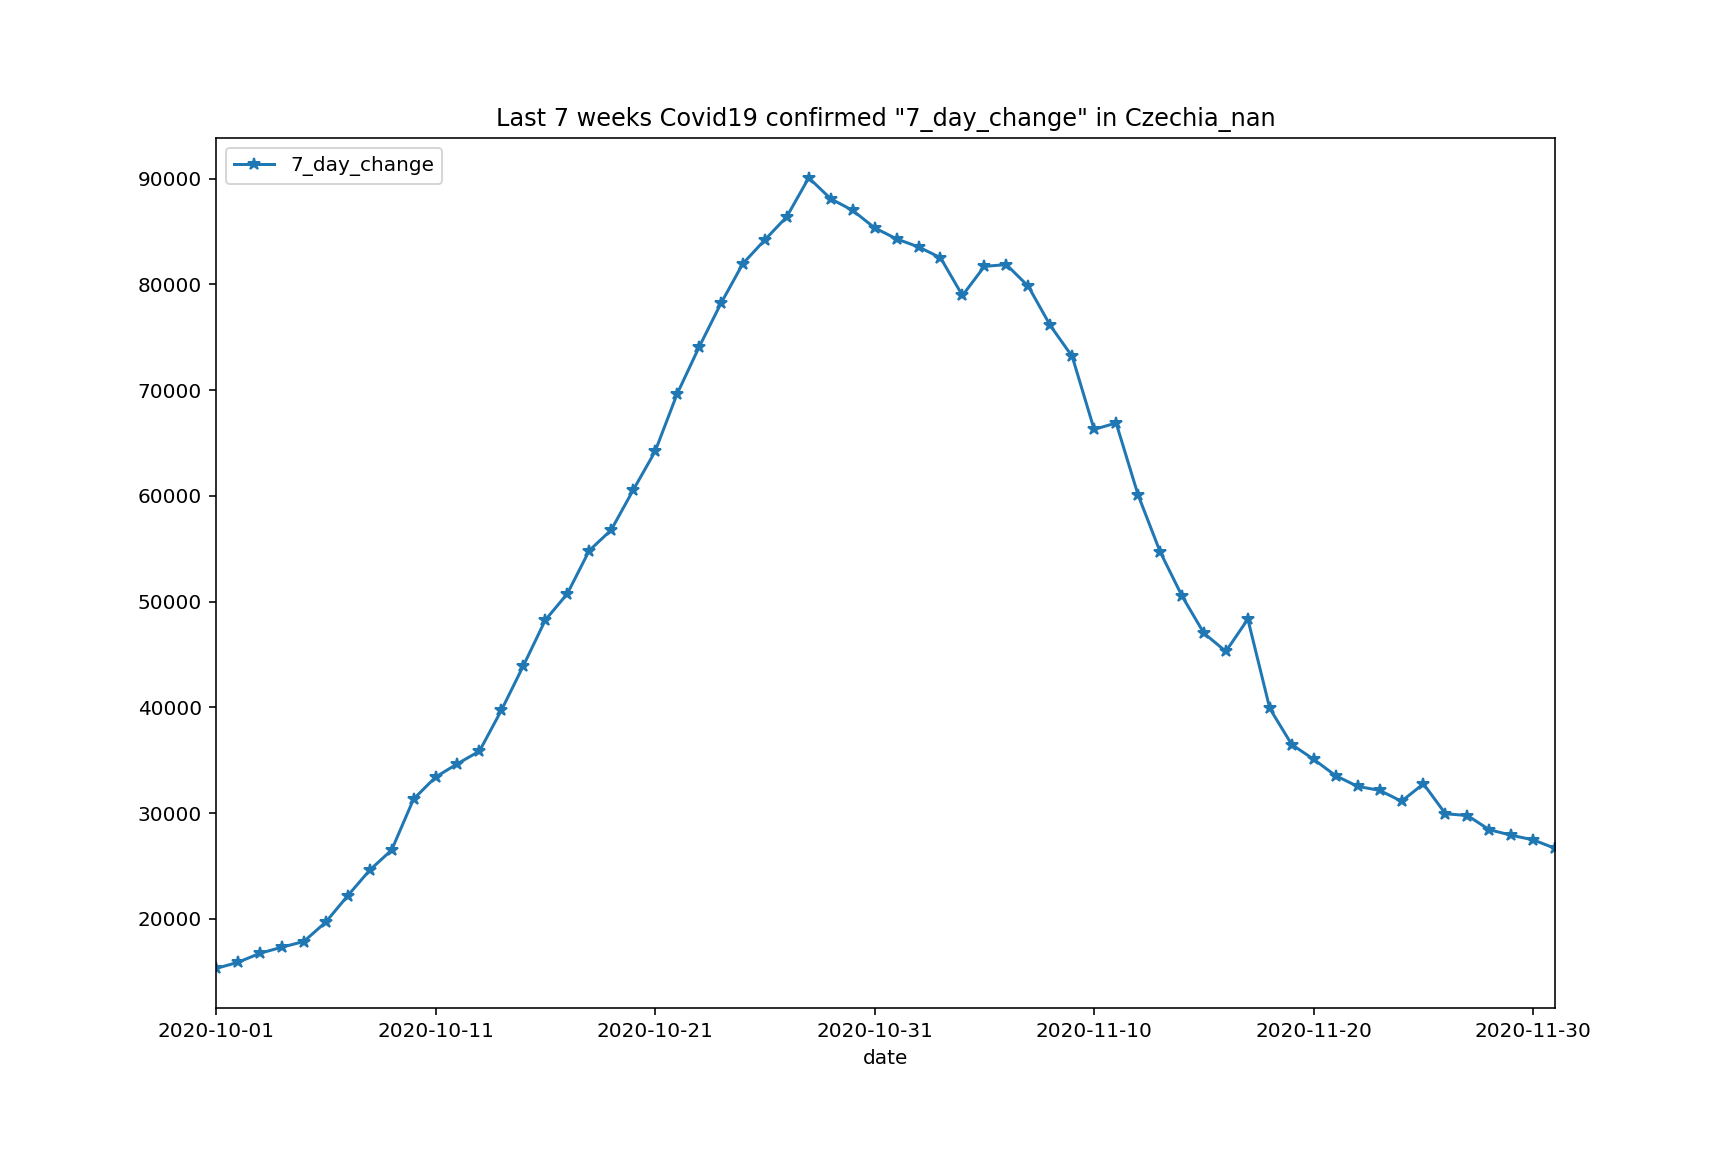

In [45]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


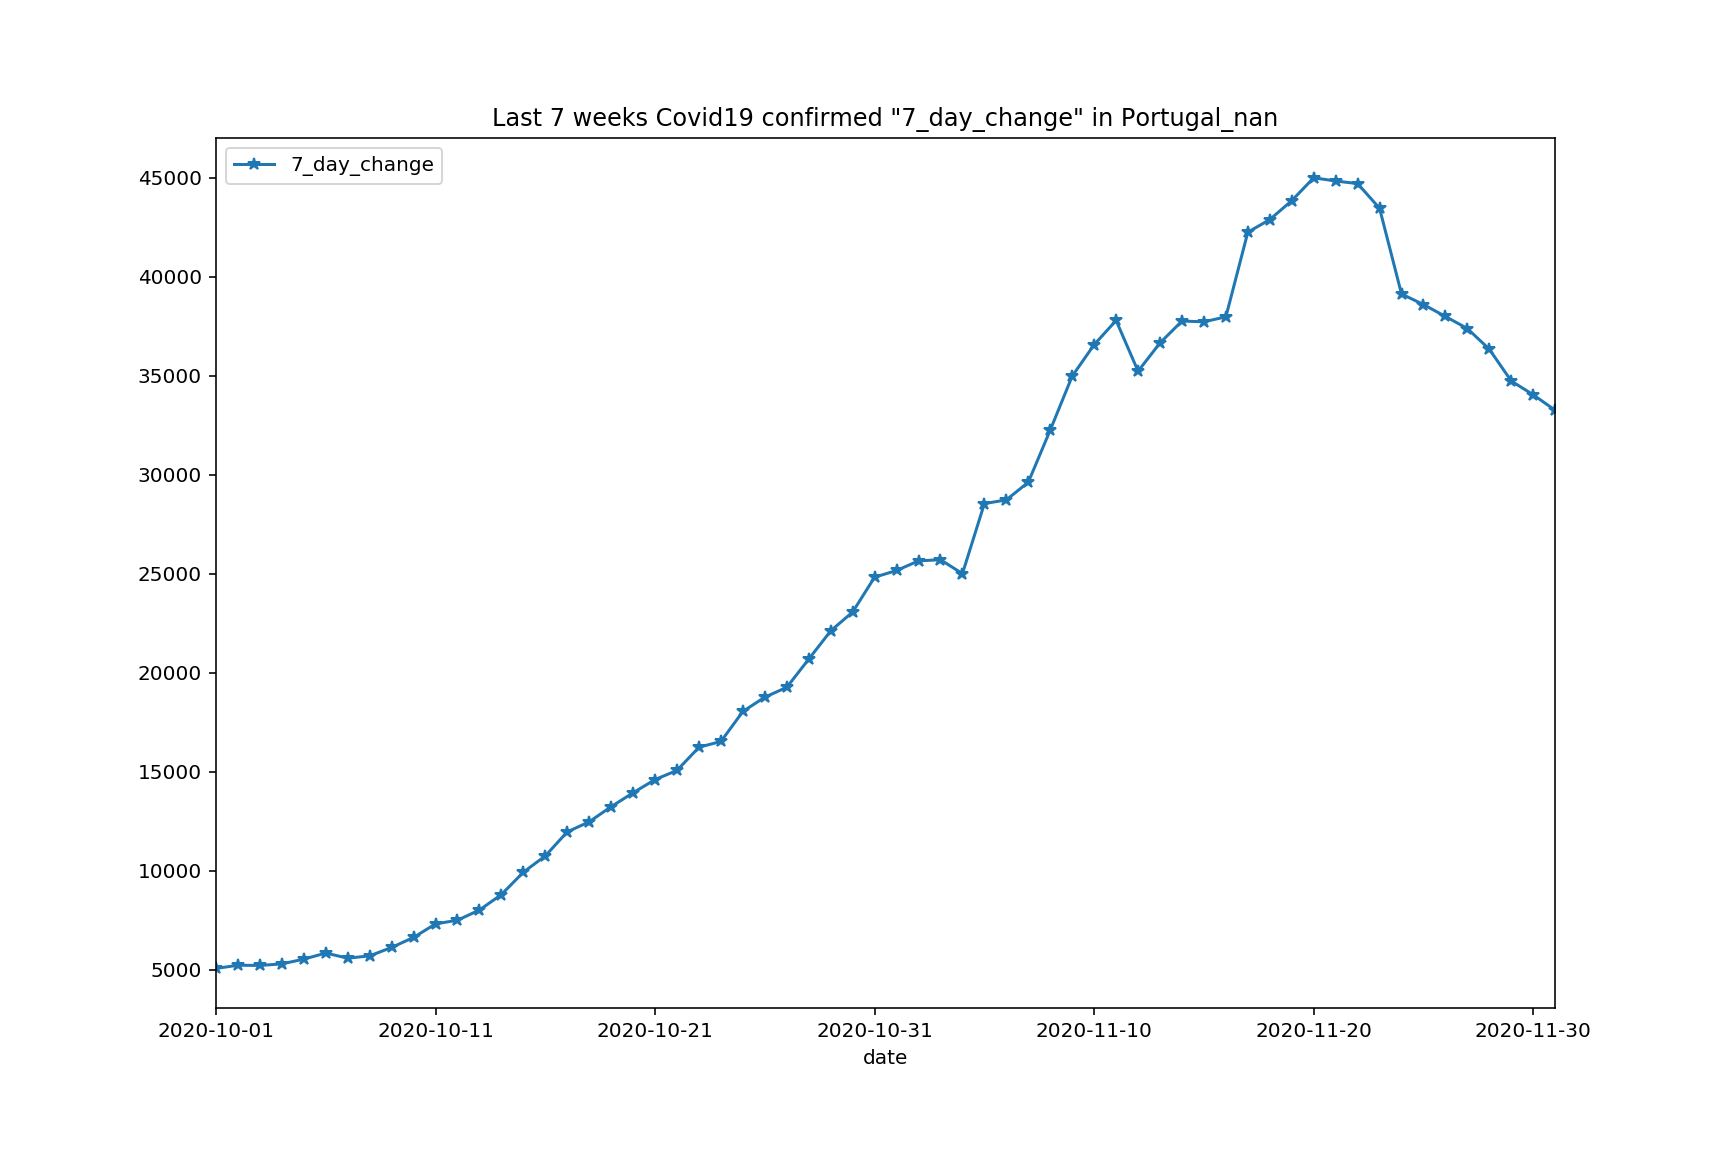

In [46]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [47]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


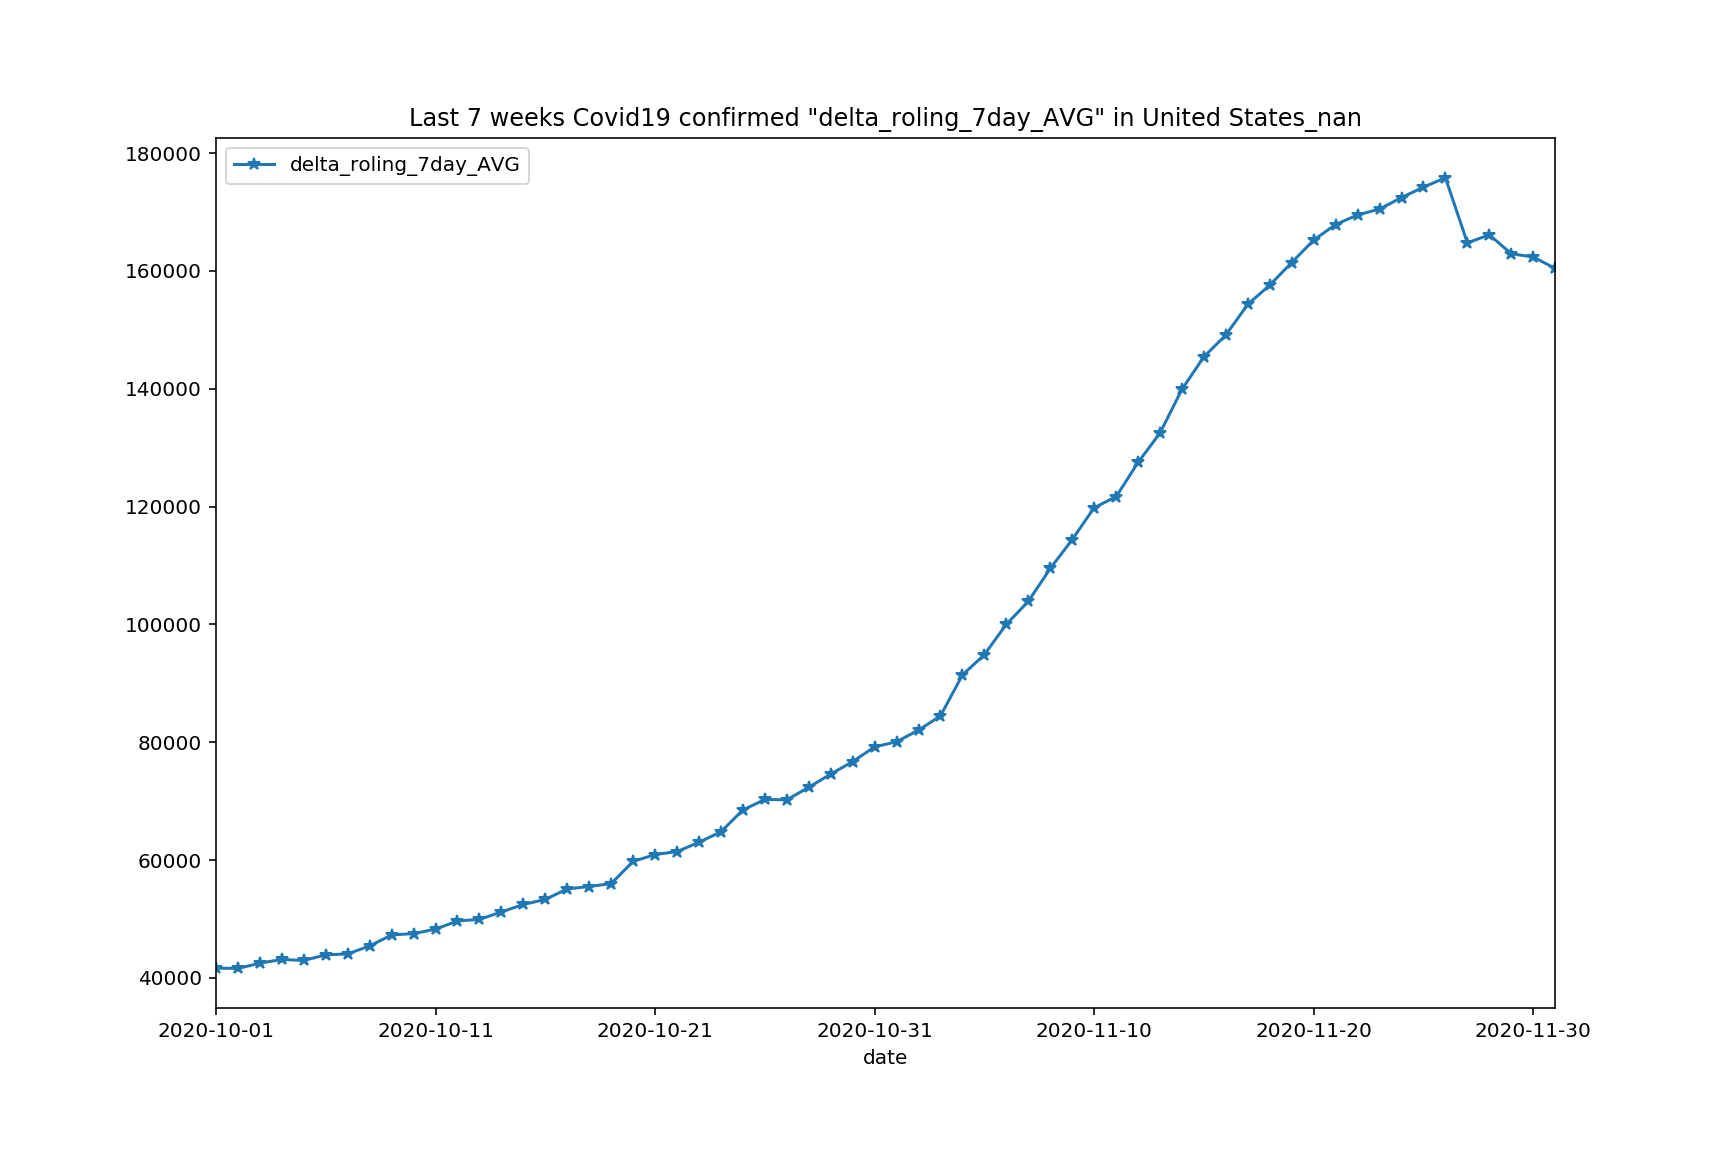

In [48]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


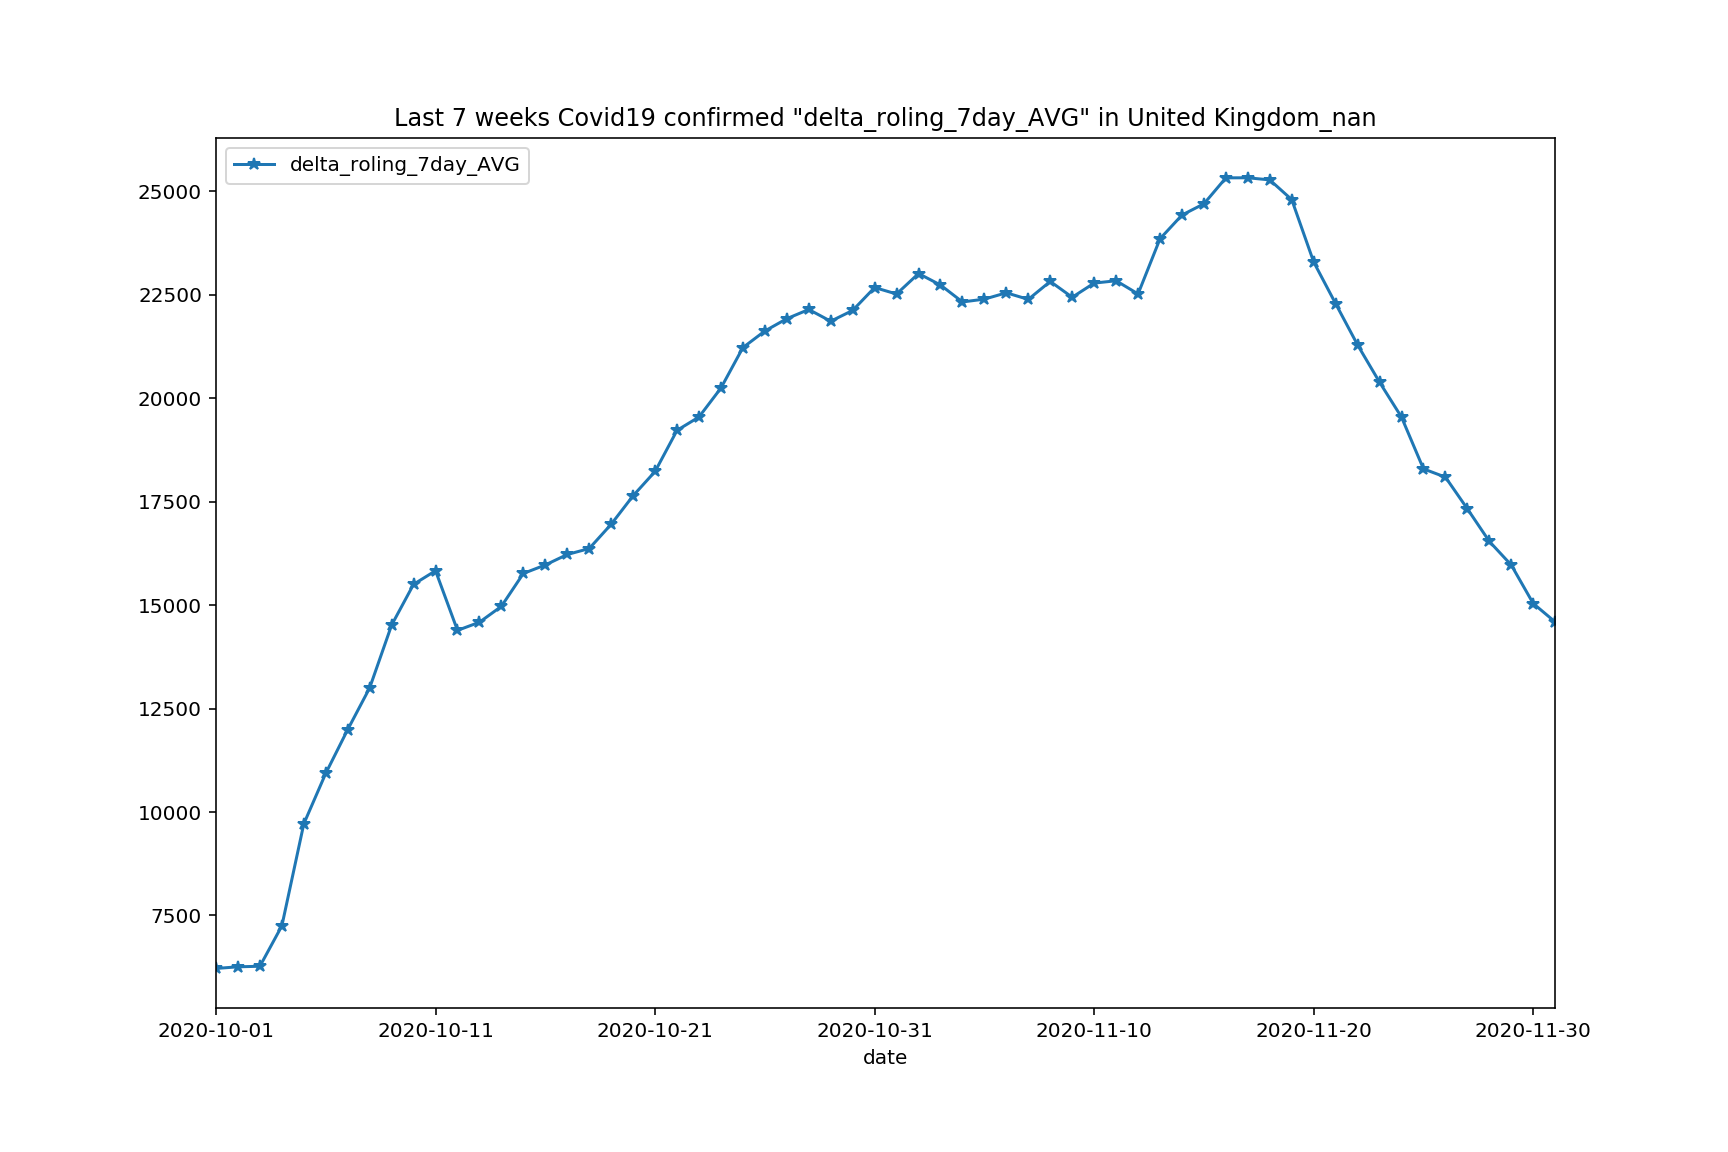

In [49]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


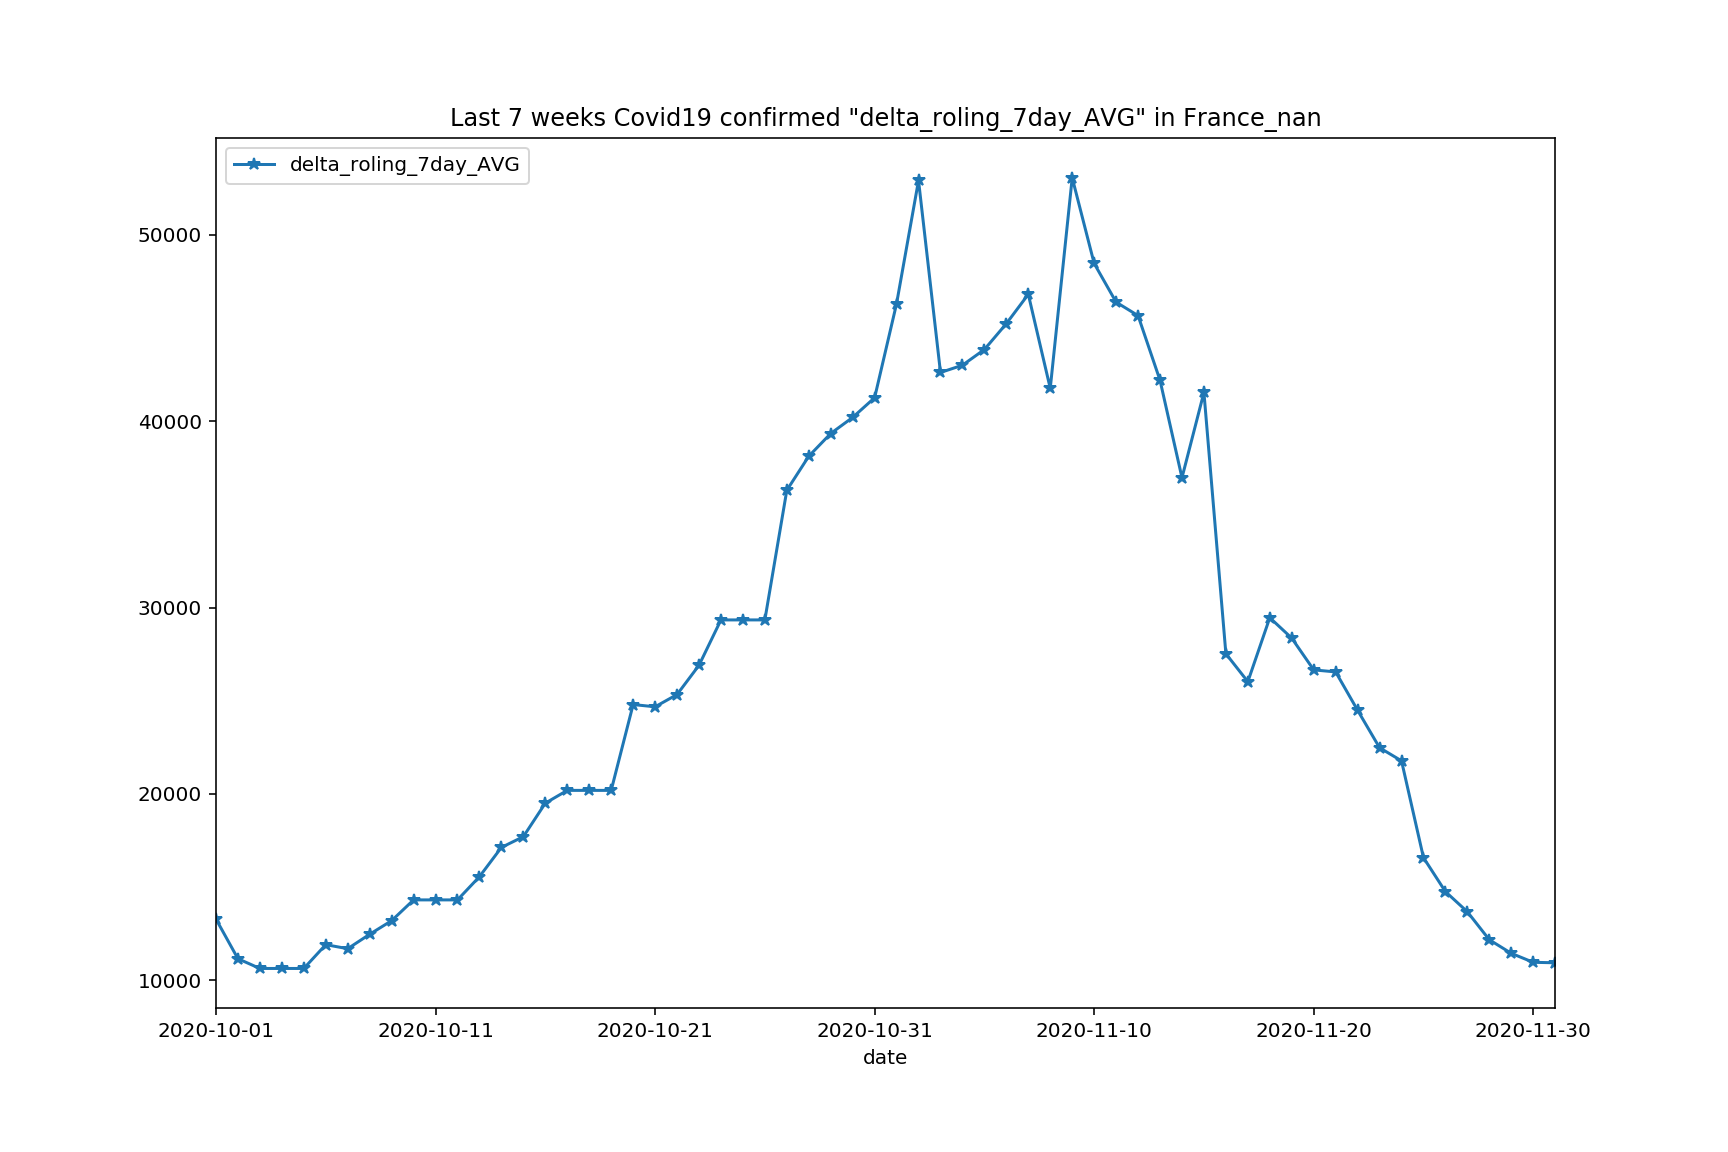

In [50]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


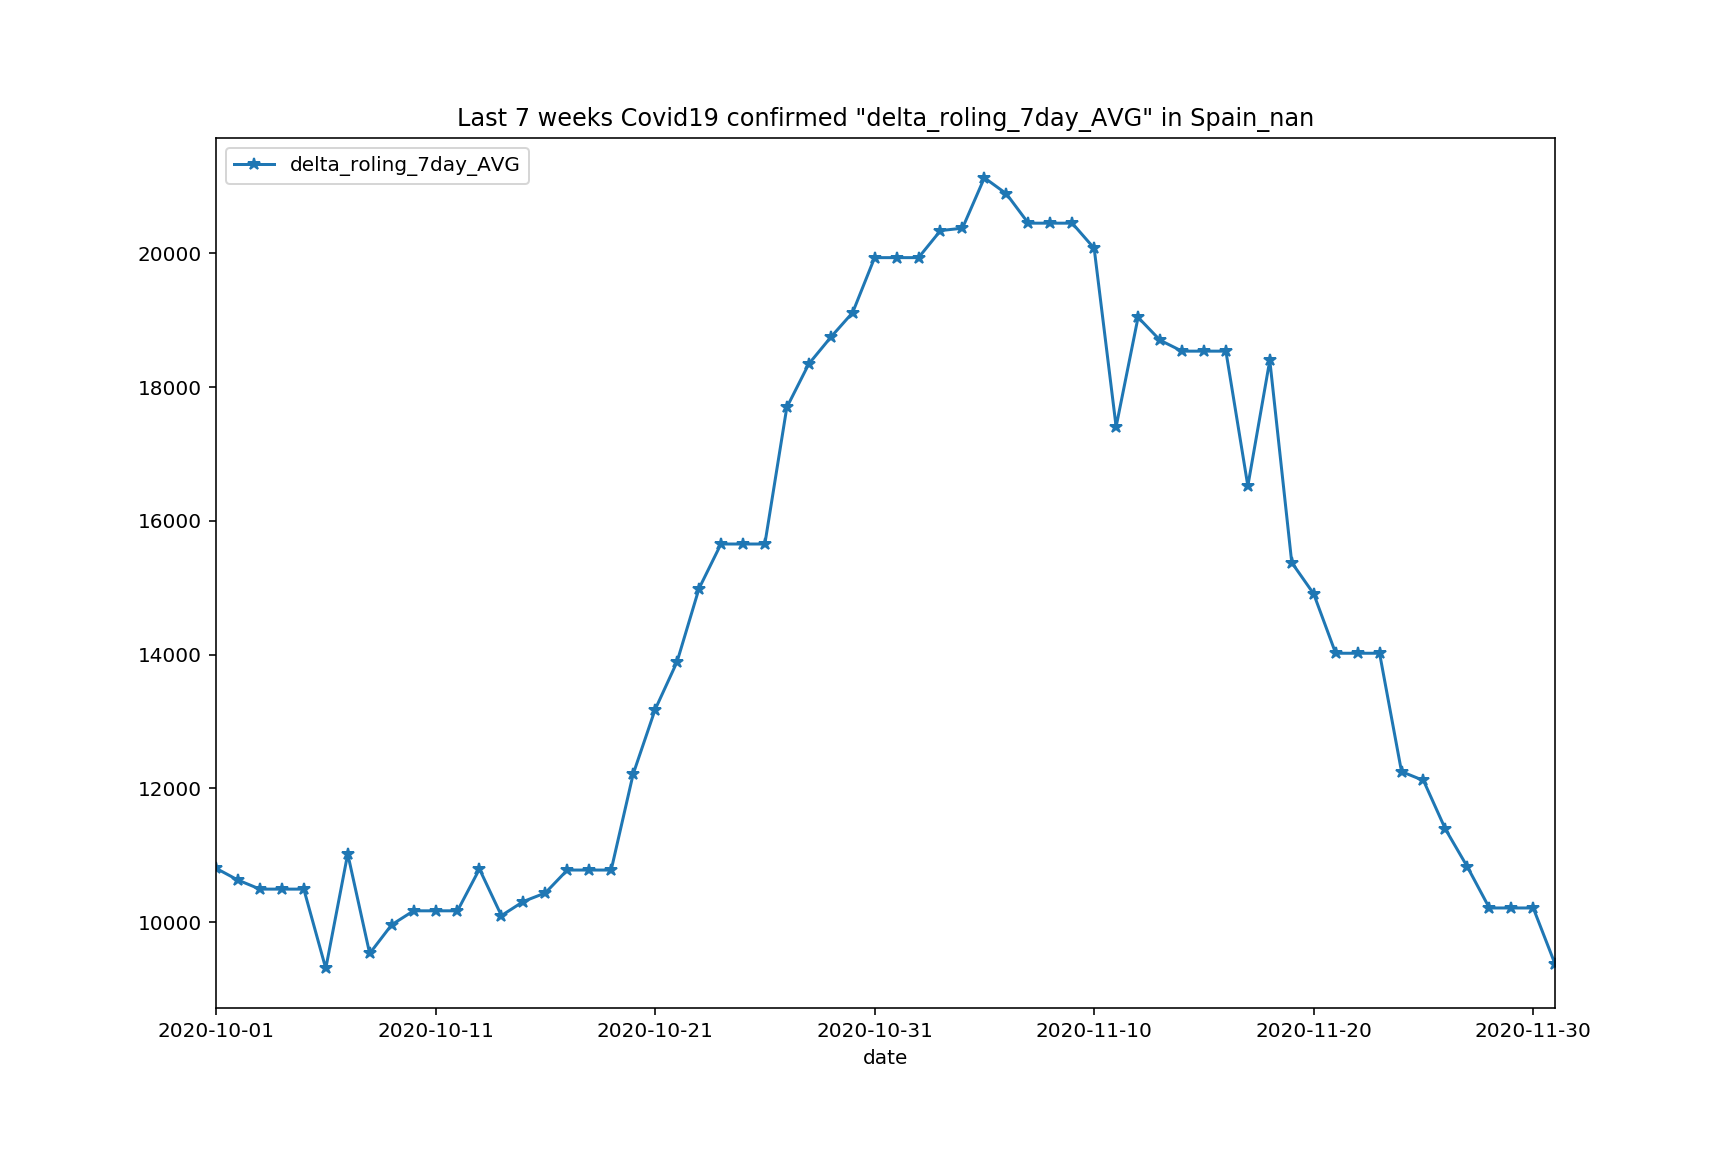

In [51]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


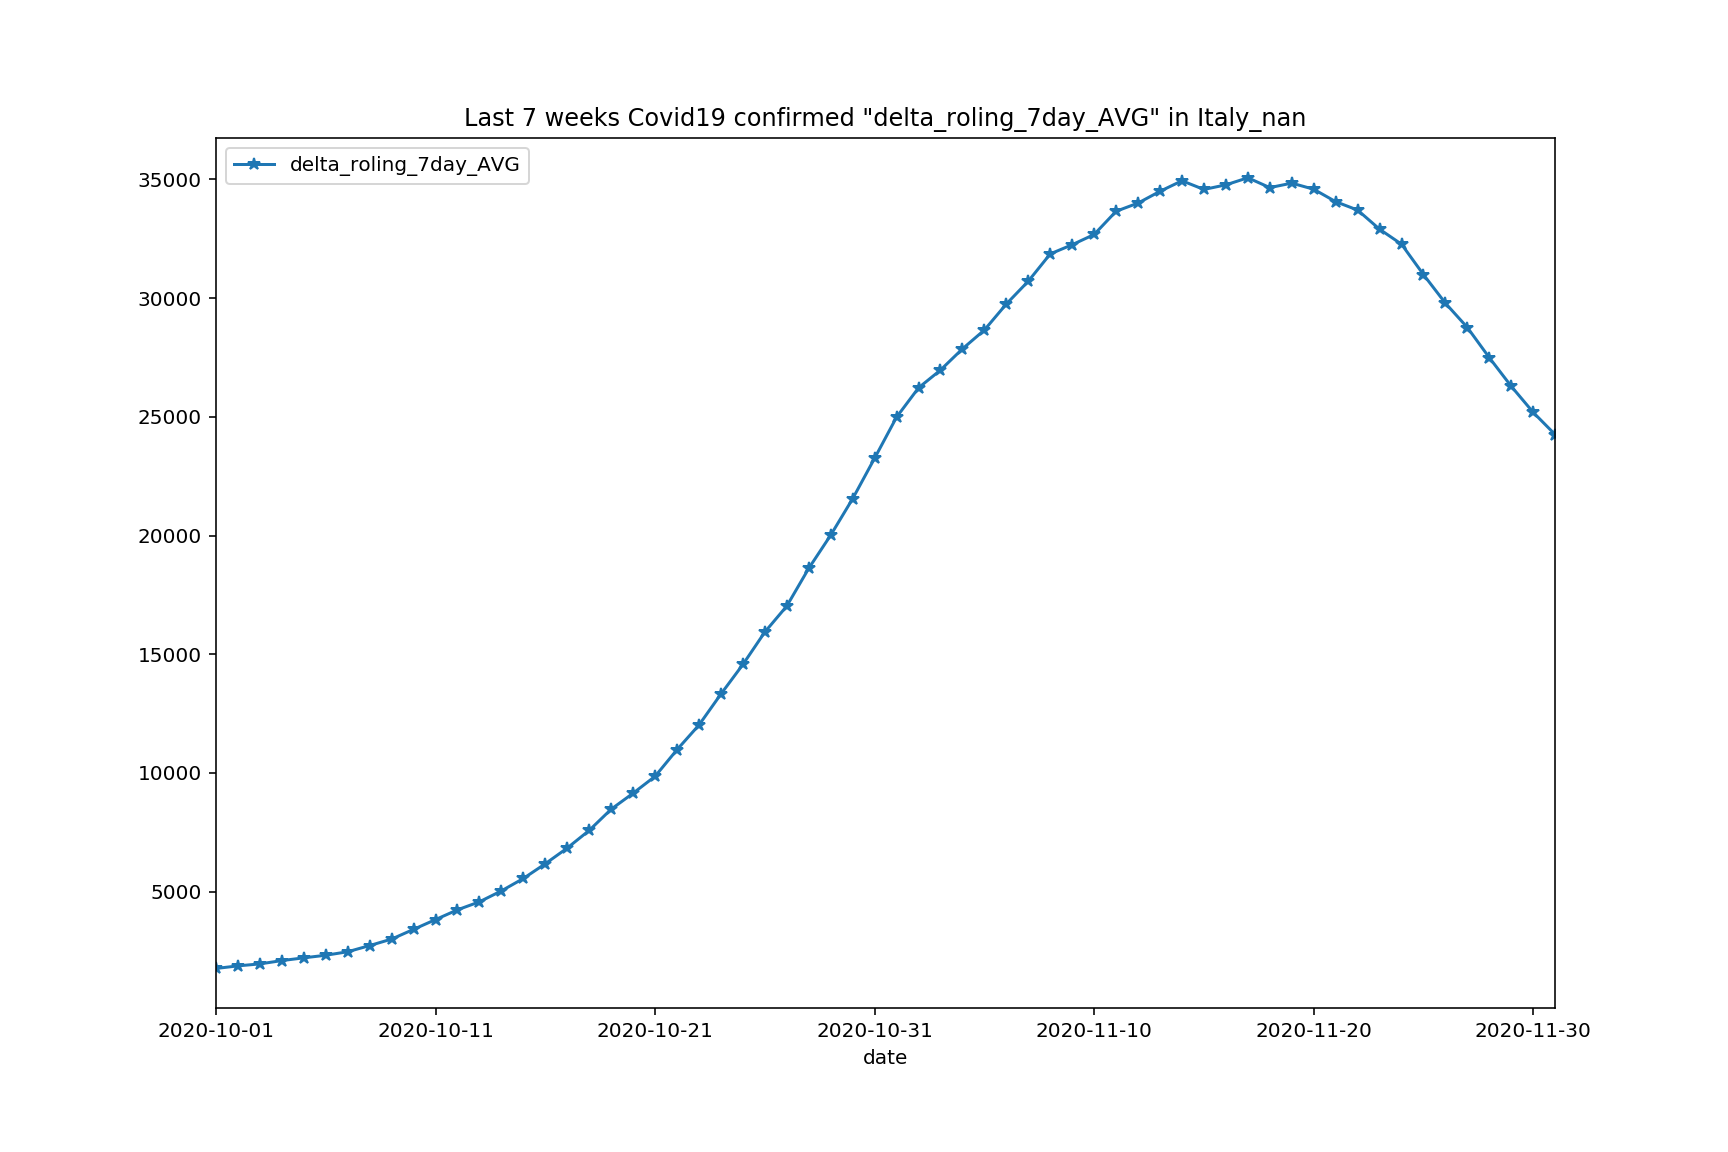

In [52]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


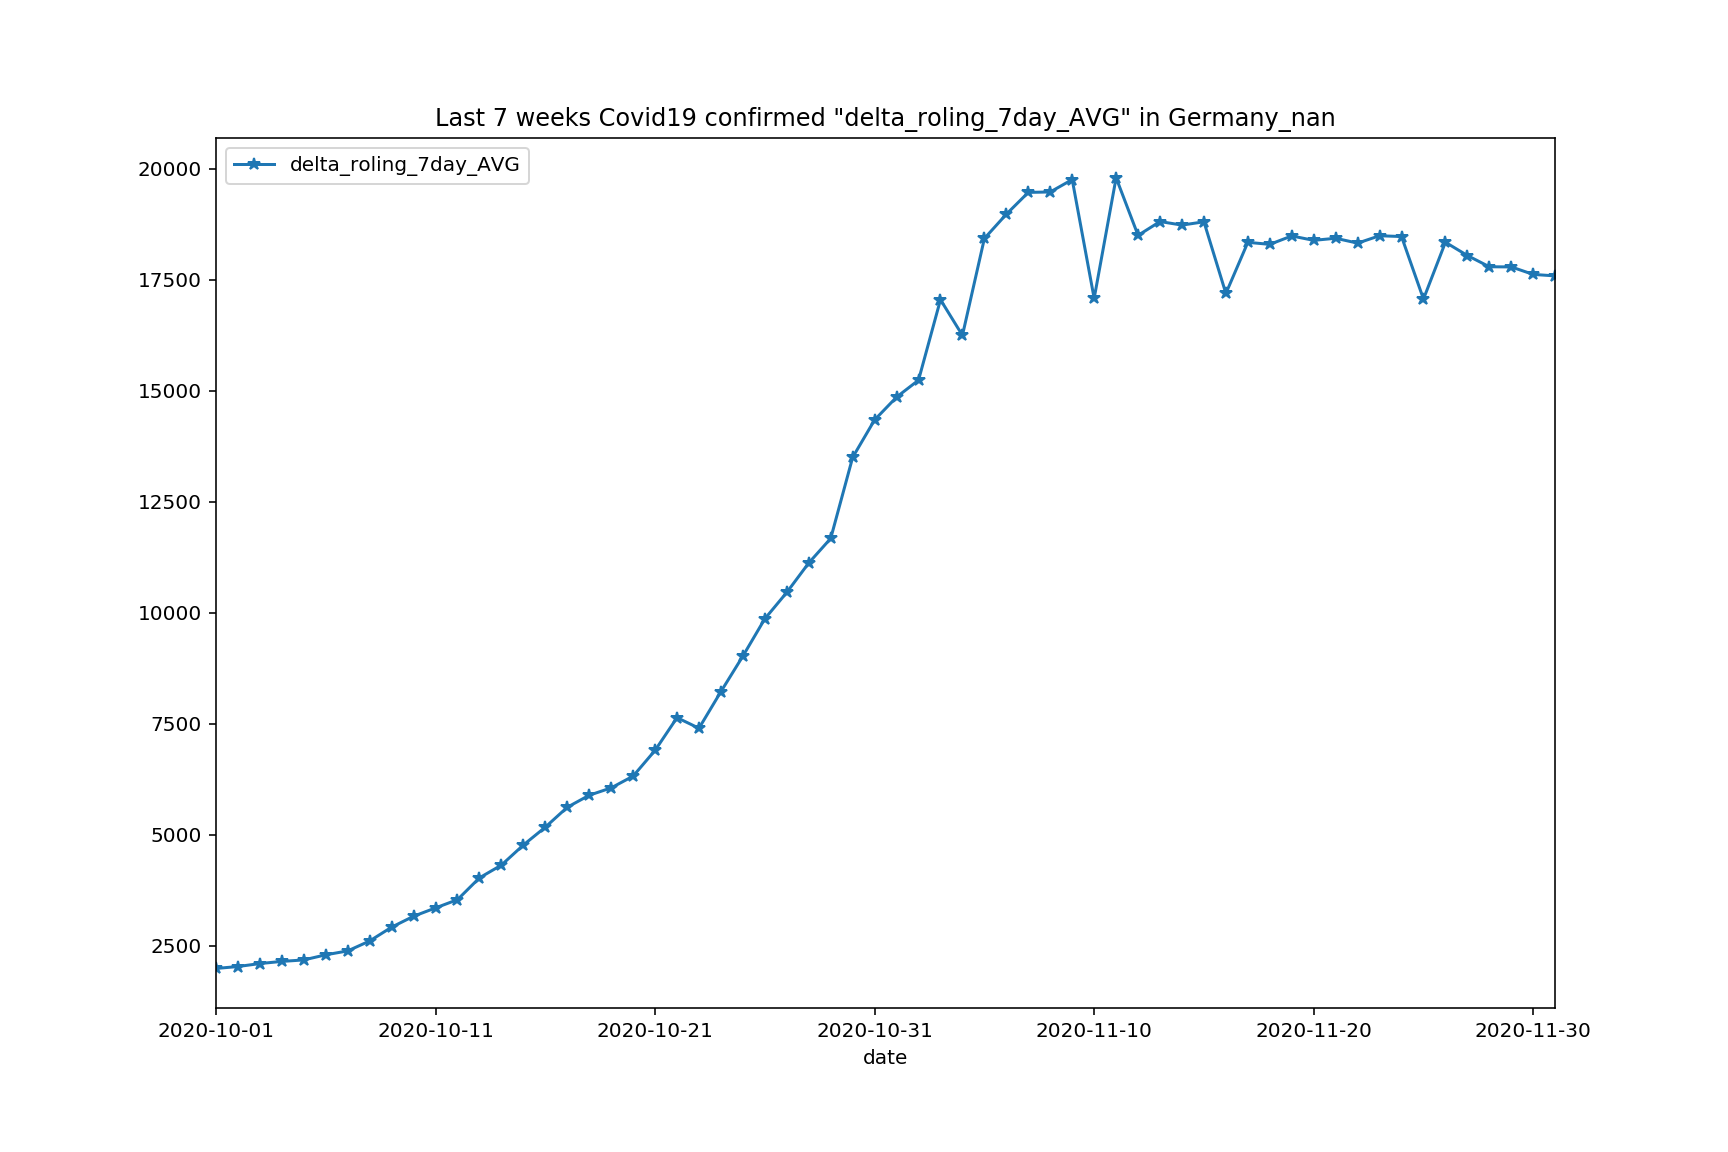

In [53]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


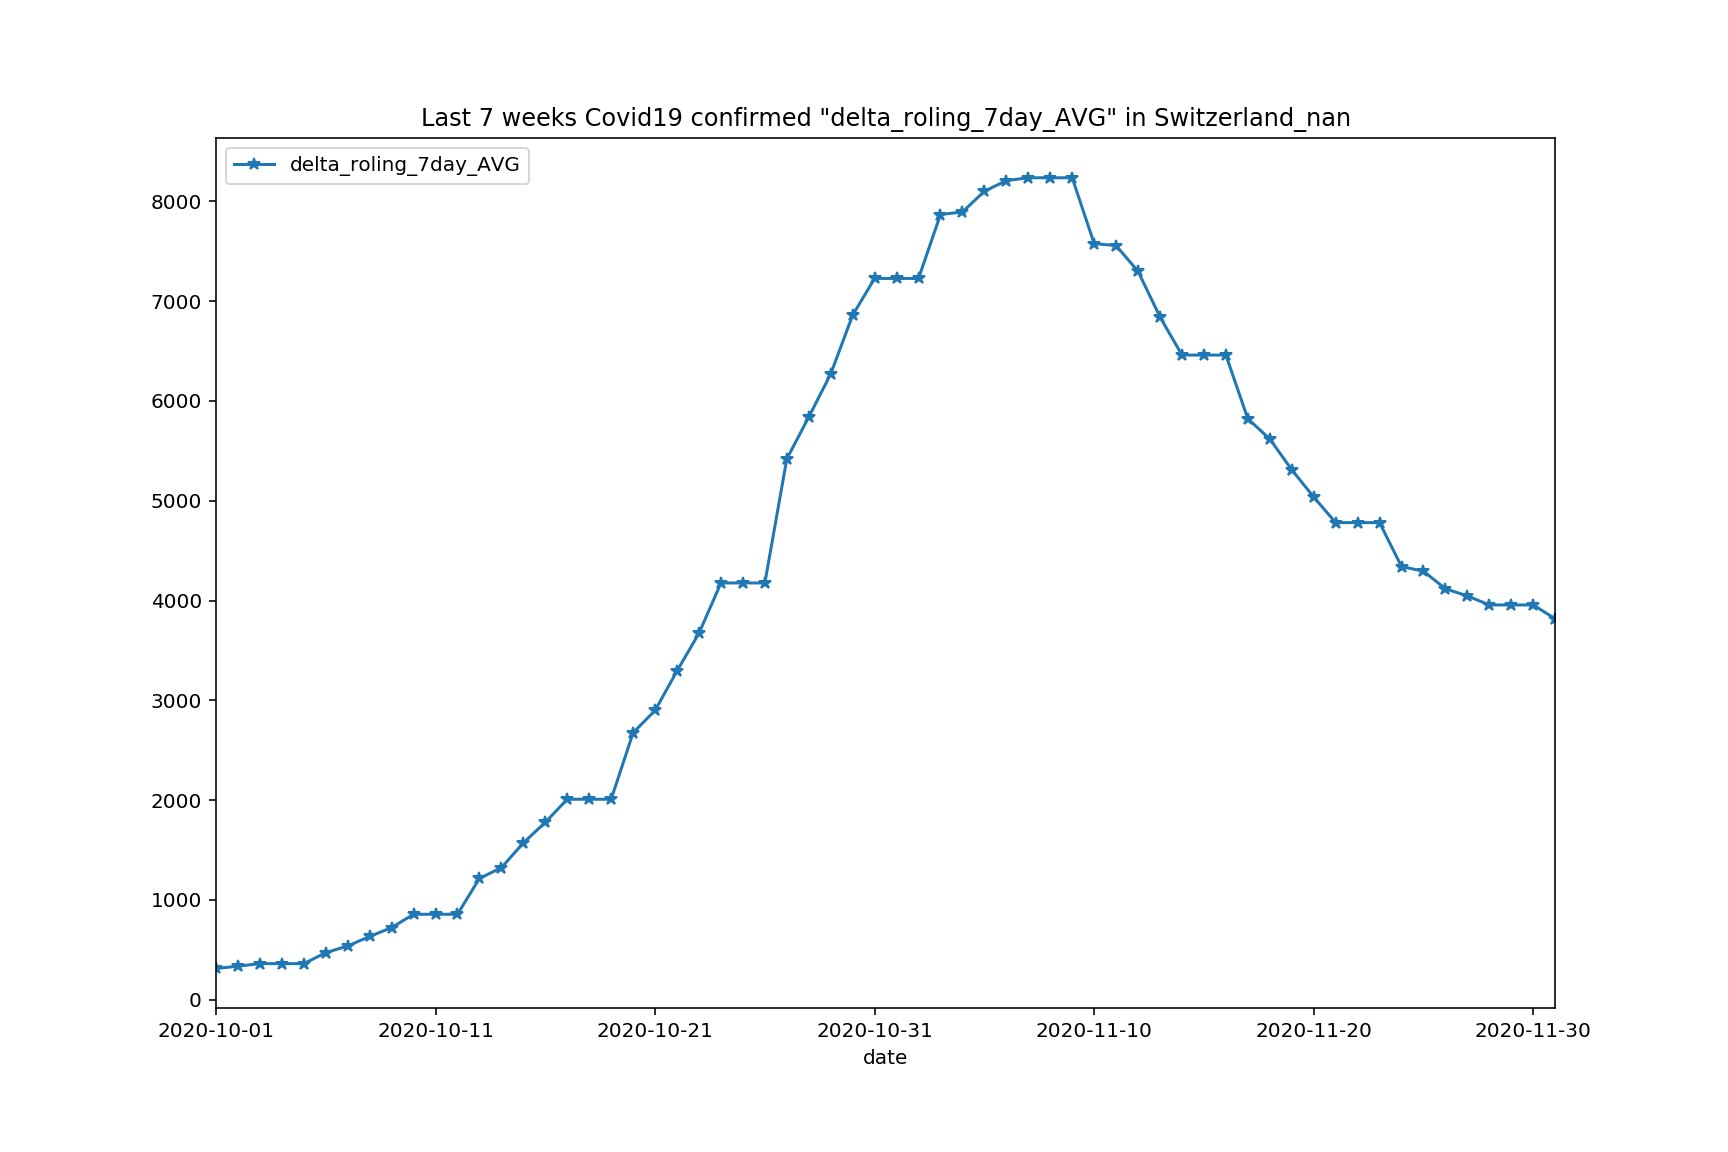

In [54]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


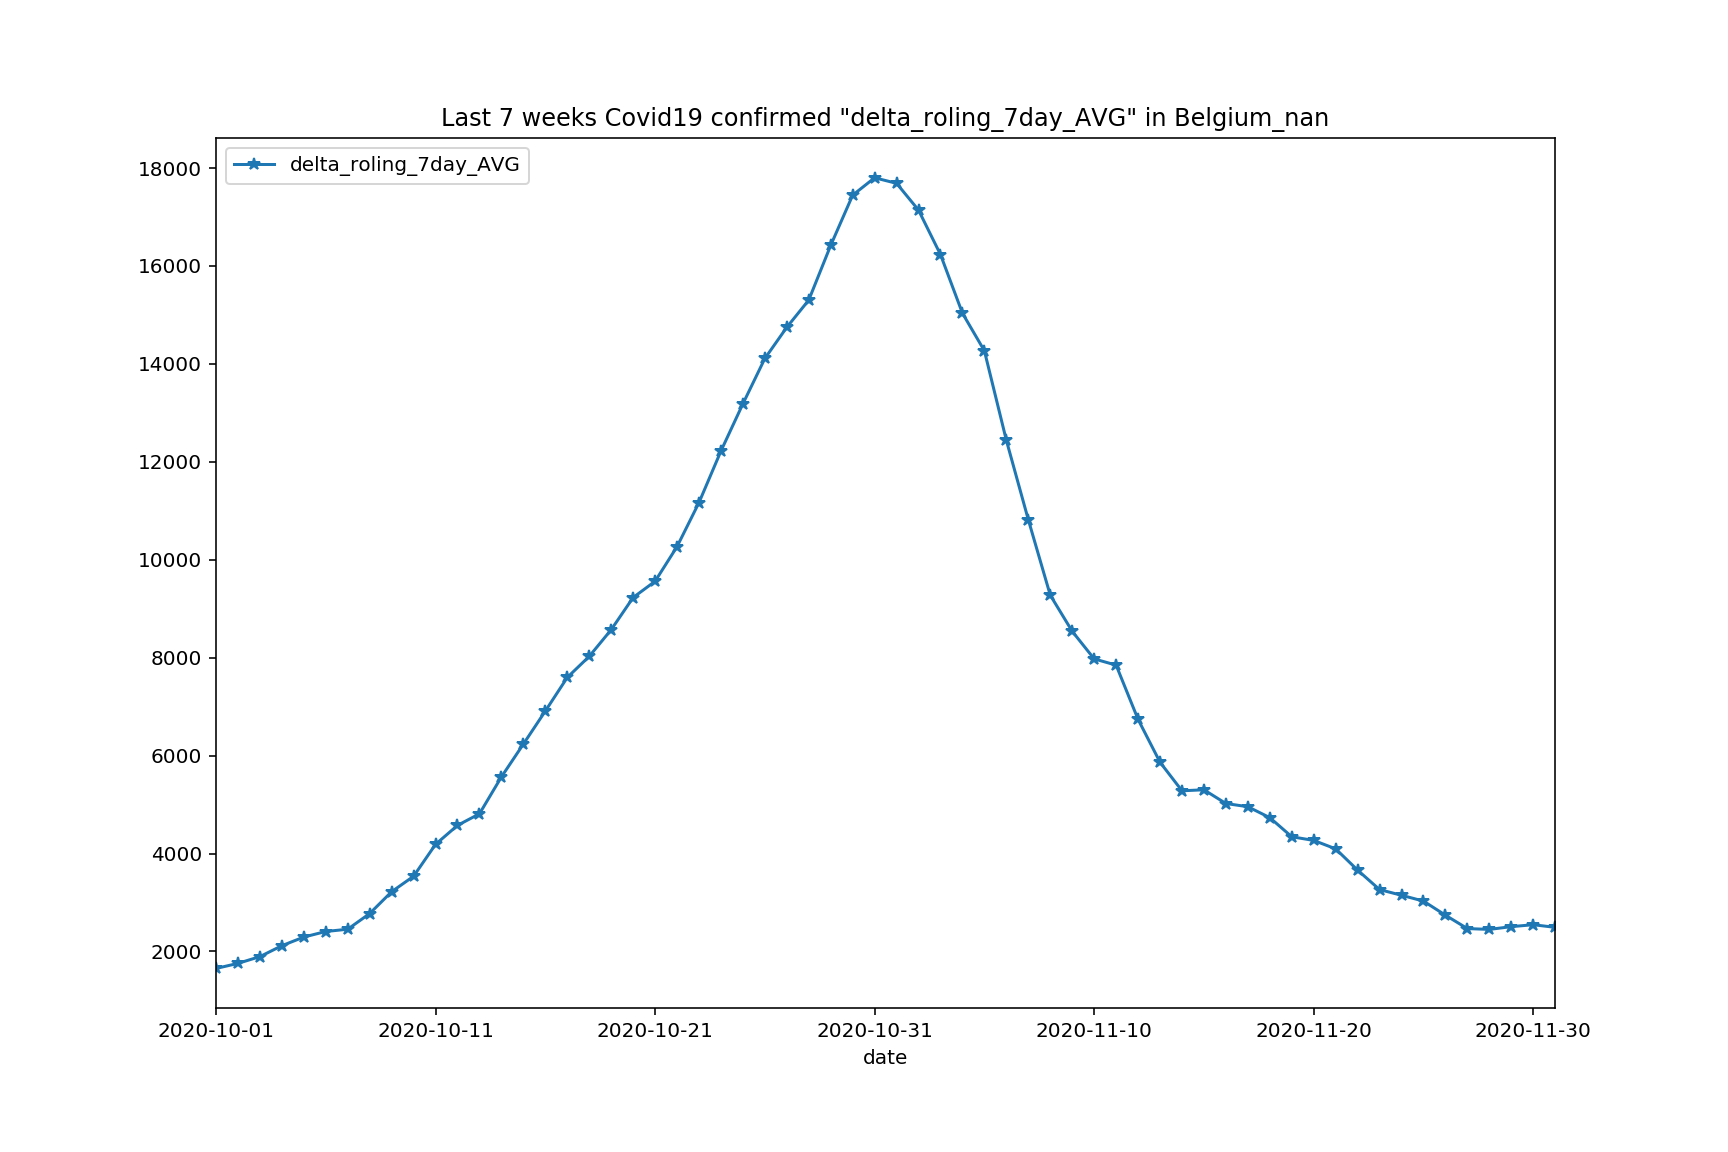

In [55]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


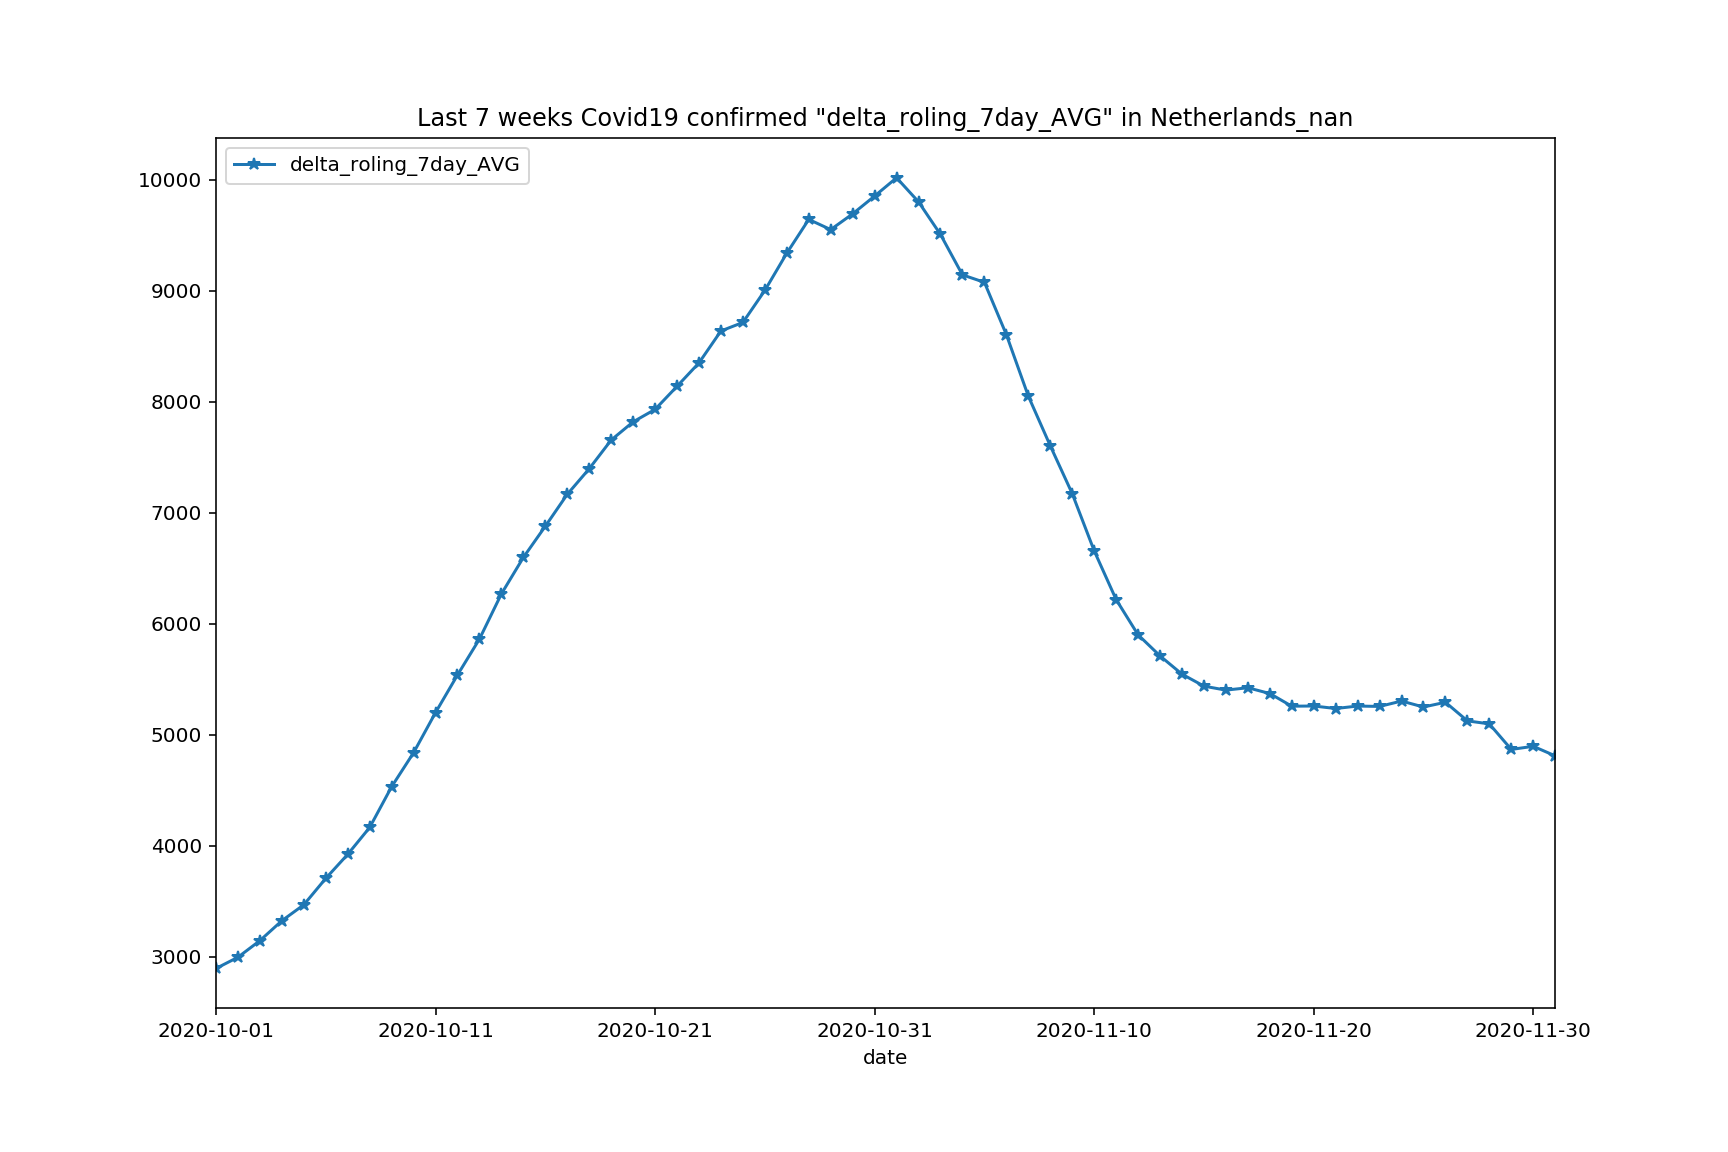

In [56]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


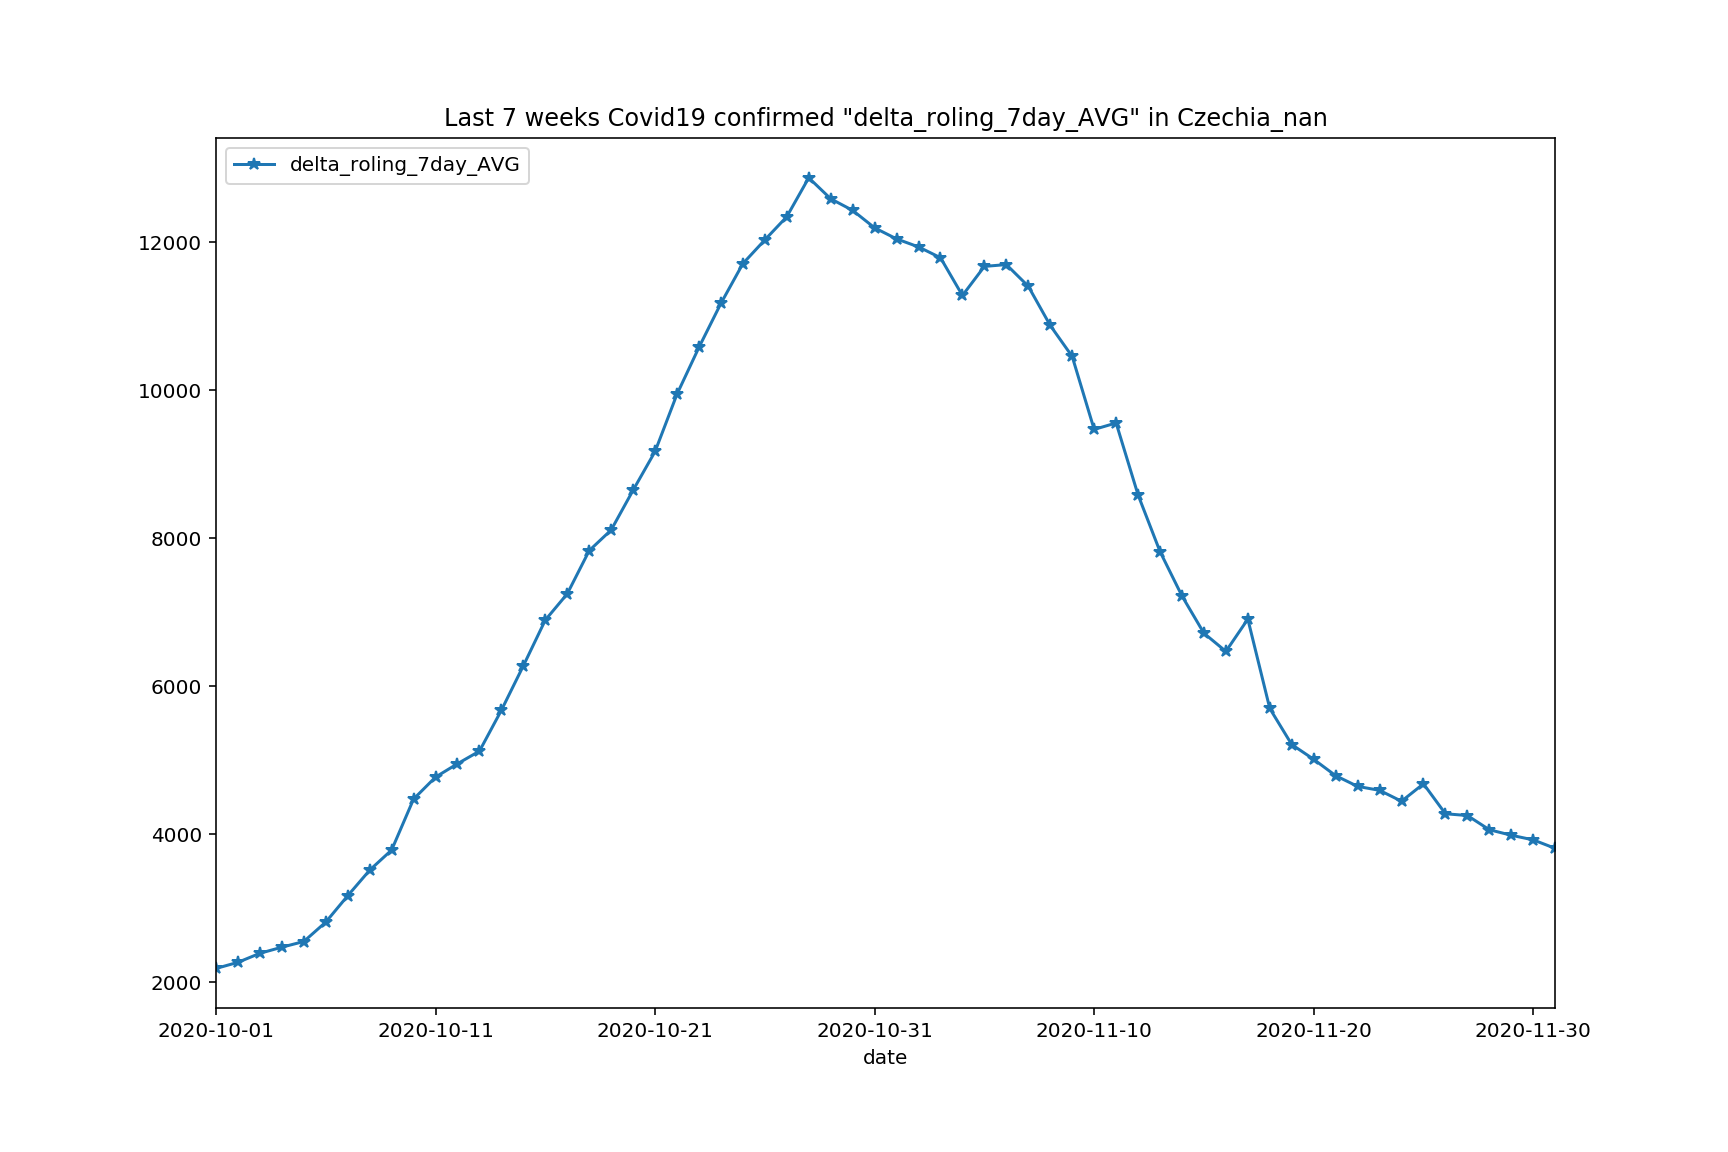

In [57]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


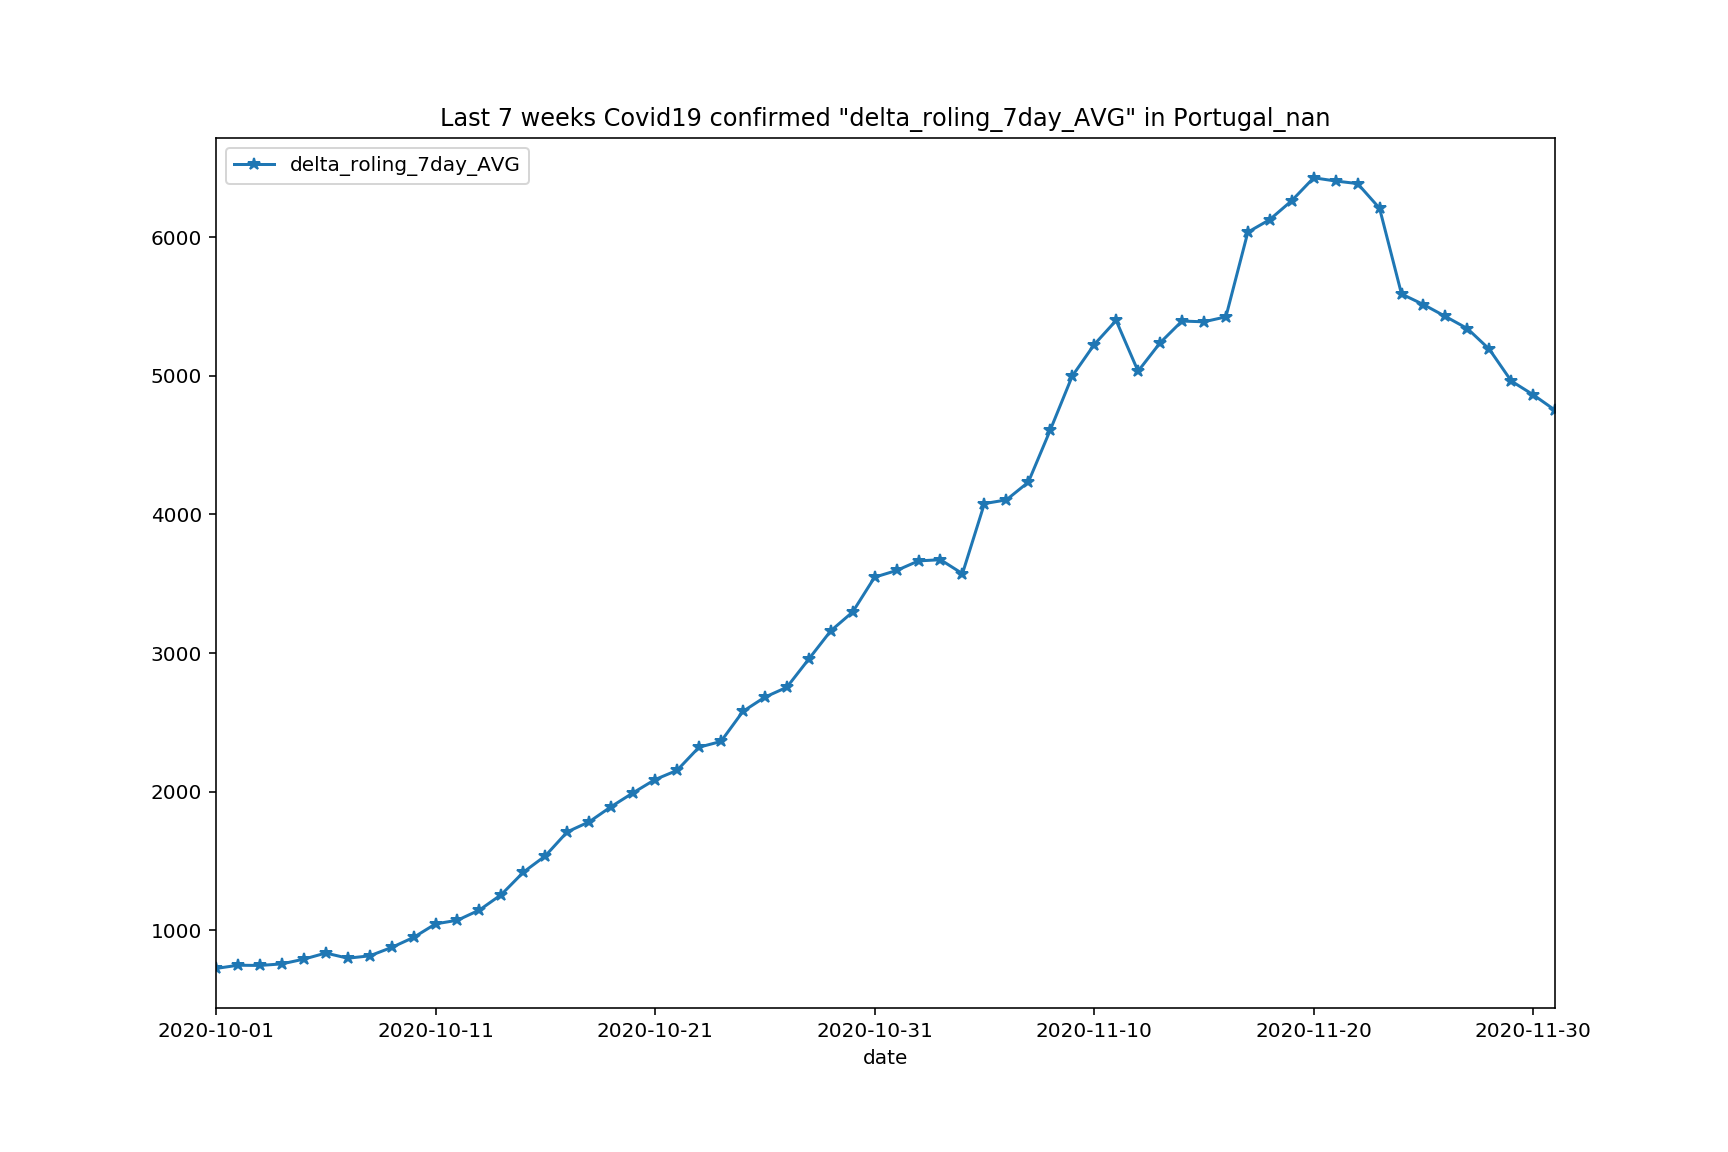

In [59]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [60]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [61]:
exit()